## Data Manipulation

### Import Data

In [1]:
import os             
import glob
import pandas as pd
import numpy as np
import scipy as sp
from scipy.interpolate import interp1d
from datetime import timedelta
import matplotlib.pyplot as plt
import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
%matplotlib inline

In [5]:
os.chdir('data')
##### get all the files that contain ".csv" #######
all_path = glob.glob( '*/**.csv' )
len(all_path)

1360

In [202]:
##### sample of the path
all_path[0:2]

['1_co_P13/12_600back_Block3_trial_012.csv',
 '1_co_P13/20_600back_Block5_trial_020.csv']

In [230]:
######## put all data into one file and add datetime column ########
dfs = []
for file in all_path:
    df = pd.read_csv(file, low_memory=False)
    df['peopleName'] = file[:8]
    df['trialName'] = file[9:]
    df['peopleTrialKey'] = file
    
    ### add a datatime column into the data
    df['datetime'] = '1970-01-01'
    df['datetimeNew'] = pd.to_datetime(df['datetime']) + pd.to_timedelta(df[';seconds'], unit='s')
    
    ### calculate new velocity
    df['seconds_shift1'] = df[';seconds'].shift(1)
    df['currentPosRoll_shift'] = df['currentPosRoll'].shift(1)
    df['calculated_vel'] = (df['currentPosRoll'] - df['currentPosRoll_shift'] )/ (df[';seconds'] - df['seconds_shift1'])
    df.dropna(inplace=True)
    df.drop(['datetime', 'seconds_shift1','currentPosRoll_shift'], axis=1, inplace=True)

    dfs.append(df)
data_all = pd.concat(dfs, ignore_index=True)
data_all = data_all.rename(columns={";seconds": "seconds"})
data_all.head()

,seconds,trialNumber,trialPhase,dirOfBalanceRoll,dirOfBalancePitch,dirOfBalanceYaw,movingDOBRoll,movingDOBPitch,movingDOBYaw,currentPosRoll,...,joystickBlanked,joystickPress,noiseRoll,noisePitch,noiseYaw,peopleName,trialName,peopleTrialKey,datetimeNew,calculated_vel
0,0.031,12,1,0,90,0,0,90,0,-15.227051,...,0,0,0,0,0,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1970-01-01 00:00:00.031,0.0
1,0.043,12,1,0,90,0,0,90,0,-15.227051,...,0,0,0,0,0,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1970-01-01 00:00:00.043,0.0
2,0.051,12,1,0,90,0,0,90,0,-15.227051,...,0,0,0,0,0,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1970-01-01 00:00:00.051,0.0
3,0.059,12,1,0,90,0,0,90,0,-15.227051,...,0,0,0,0,0,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1970-01-01 00:00:00.059,0.0
4,0.069,12,1,0,90,0,0,90,0,-15.227051,...,0,0,0,0,0,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1970-01-01 00:00:00.069,0.0


In [233]:
data_all[['currentVelRoll','calculated_vel']].tail()

,currentVelRoll,calculated_vel
9725516,-67.162342,-44.319846
9725517,-64.158275,-49.830845
9725518,-63.428716,-46.317361
9725519,-61.197124,-50.187544
9725520,-60.639226,-53.362165


In [430]:
####### save data into one csv file #######
data_all.to_csv('data_all.csv')

In [248]:
####### all data information #######
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9725521 entries, 0 to 9725520
Data columns (total 36 columns):
 #   Column             Dtype         
---  ------             -----         
 0   seconds            float64       
 1   trialNumber        int64         
 2   trialPhase         int64         
 3   dirOfBalanceRoll   int64         
 4   dirOfBalancePitch  int64         
 5   dirOfBalanceYaw    int64         
 6   movingDOBRoll      int64         
 7   movingDOBPitch     int64         
 8   movingDOBYaw       int64         
 9   currentPosRoll     float64       
 10  currentPosPitch    float64       
 11  currentPosYaw      int64         
 12  currentVelRoll     float64       
 13  currentVelPitch    float64       
 14  currentVelYaw      int64         
 15  calcPosRoll        float64       
 16  calcPosPitch       float64       
 17  calcPosYaw         int64         
 18  calcVelRoll        float64       
 19  calcVelPitch       float64       
 20  calcVelYaw         int64

## Data Manipulation

### choose needed columns

In [3]:
data_all = pd.read_csv('data/data_all.csv')

##### extract all needed columns ######
neededCols = ['seconds','trialPhase','currentPosRoll','currentVelRoll','calculated_vel',\
              'joystickX', 'peopleName', 'trialName', 'peopleTrialKey', 'datetimeNew']

data_needed = data_all[neededCols]
data_needed['datetimeNew'] = pd.to_datetime(data_needed['datetimeNew'])
data_needed.set_index('datetimeNew', inplace =True)
data_needed.tail(5)

,seconds,trialPhase,currentPosRoll,currentVelRoll,calculated_vel,joystickX,peopleName,trialName,peopleTrialKey
datetimeNew,,,,,,,,,
1970-01-01 00:01:53.298,113.298,3,14.955139,-67.162342,-44.319846,0.000000,2_xz_P11,04_600back_Block1_trial_004.csv,2_xz_P11/04_600back_Block1_trial_004.csv
1970-01-01 00:01:53.319,113.319,3,13.908691,-64.158275,-49.830845,0.000000,2_xz_P11,04_600back_Block1_trial_004.csv,2_xz_P11/04_600back_Block1_trial_004.csv
1970-01-01 00:01:53.341,113.341,3,12.889709,-63.428716,-46.317361,0.000000,2_xz_P11,04_600back_Block1_trial_004.csv,2_xz_P11/04_600back_Block1_trial_004.csv
1970-01-01 00:01:53.363,113.363,3,11.785583,-61.197124,-50.187544,-0.000031,2_xz_P11,04_600back_Block1_trial_004.csv,2_xz_P11/04_600back_Block1_trial_004.csv
1970-01-01 00:01:53.384,113.384,3,10.664978,-60.639226,-53.362165,-0.000031,2_xz_P11,04_600back_Block1_trial_004.csv,2_xz_P11/04_600back_Block1_trial_004.csv


## checking calculated velocity

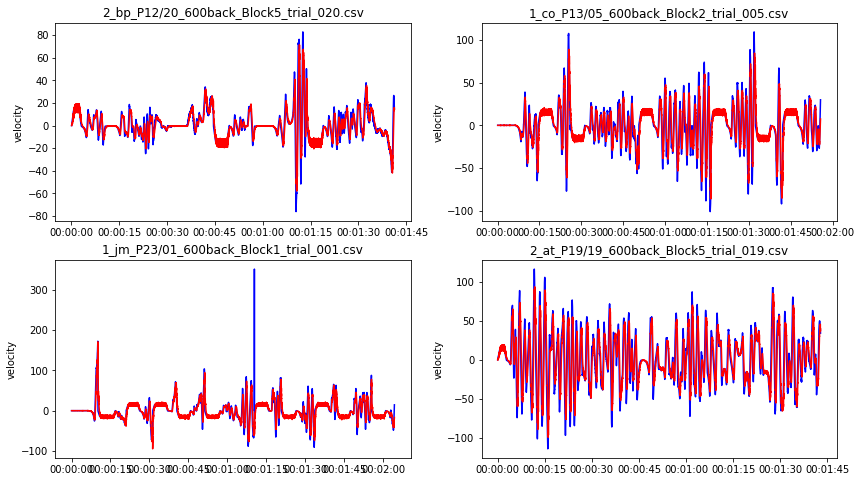

In [247]:
random_path = np.random.choice(all_path, size=4, replace=False)

fig, axes = plt.subplots(2,2, figsize=(14,8), squeeze = False)
for i, path in enumerate(random_path):
    data = data_needed[data_needed.peopleTrialKey == path]
    x = data.index
    y1 = data.currentVelRoll
    y2 = data.calculated_vel
    ax = axes[i//2, i%2]
    ax.plot(x,y1,color='blue')
    ax.plot(x,y2,color='red')
    ax.set_title(path)
    ax.set_ylabel("velocity")

Both machine velocity and calculated velocity are quite similar over all, even though there might be some outliers in machine velocity which have big gap compare to calculated velocity. So, the calculated velocity is usable to solve the machine delay issue. (30-40ms)

## Try define the crash on different criteria

In [249]:
###### time -1 on 'joystickX' column
data_needed['joystickX'] = data_needed['joystickX']*-1

data_test = data_needed

###### flag crash event as 1 based on "currentPosRoll"
data_test.loc[ (data_test['trialPhase']==4)&\
                ( (data_test['currentPosRoll']>=60) | (data_test['currentPosRoll']<=-60) ), 'crash']  = 1
data_test['crash'].fillna(0, inplace=True)

data_test.head()

,seconds,trialPhase,currentPosRoll,currentVelRoll,calculated_vel,joystickX,peopleName,trialName,peopleTrialKey,crash
datetimeNew,,,,,,,,,,
1970-01-01 00:00:00.031,0.031,1,-15.227051,0.000000,0.0,-0.0,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,0.0
1970-01-01 00:00:00.043,0.043,1,-15.227051,0.005364,0.0,-0.0,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,0.0
1970-01-01 00:00:00.051,0.051,1,-15.227051,0.005364,0.0,-0.0,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,0.0
1970-01-01 00:00:00.059,0.059,1,-15.227051,0.171661,0.0,-0.0,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,0.0
1970-01-01 00:00:00.069,0.069,1,-15.227051,0.386237,0.0,-0.0,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,0.0


In [250]:
###### find all the flagged crash events
# crash_event = data_test[data_test.peopleTrialKey.isin(all_path)]

##### excluding the trialPhase=1 and the left are human being behavior 
data_human = data_test[data_test.trialPhase!=1]
data_human.head()

,seconds,trialPhase,currentPosRoll,currentVelRoll,calculated_vel,joystickX,peopleName,trialName,peopleTrialKey,crash
datetimeNew,,,,,,,,,,
1970-01-01 00:00:01.774,1.774,3,-0.829468,0.000000,3.662109,-0.0,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,0.0
1970-01-01 00:00:01.795,1.795,3,-0.760803,-0.171661,3.269741,-0.0,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,0.0
1970-01-01 00:00:01.817,1.817,3,-0.686646,-0.514983,3.370805,-0.0,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,0.0
1970-01-01 00:00:01.838,1.838,3,-0.620728,-0.514983,3.138951,-0.0,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,0.0
1970-01-01 00:00:01.860,1.860,3,-0.560303,-0.686644,2.746582,-0.0,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,0.0


In [251]:
##### define crash event by trialPhase 
crashed_on_trialPhase = data_needed[data_needed.trialPhase==4]

##### excluding the trialPhase=1 and the left are human being behavior 
crashed_on_trialPhase = crashed_on_trialPhase[crashed_on_trialPhase.trialPhase!=1]
crashed_on_trialPhase.head()

,seconds,trialPhase,currentPosRoll,currentVelRoll,calculated_vel,joystickX,peopleName,trialName,peopleTrialKey,crash
datetimeNew,,,,,,,,,,
1970-01-01 00:00:22.398,22.398,4,59.436035,94.134567,94.482422,-0.880920,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,0.0
1970-01-01 00:00:35.087,35.087,4,-60.455017,-11.415452,-27.122498,0.843781,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1.0
1970-01-01 00:01:11.218,71.218,4,-60.578613,2.456897,-23.689270,0.820343,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1.0
1970-01-01 00:01:27.480,87.480,4,60.262756,44.052488,29.182434,-0.579346,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1.0
1970-01-01 00:01:37.565,97.565,4,-60.367126,-27.508665,-36.735535,0.796906,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1.0


In [6]:
print('There are %s crash event based on +- 60 degrees'%len(data_human[data_human.crash==1]) )  

There are 4300 crash event based on +- 60 degrees


In [7]:
print('There are %s crash event based on trialPhase'% len(crashed_on_trialPhase))

There are 6251 crash event based on trialPhase


In [8]:
print('There are %s unique peopleTrial has at least one crash based on trialPhase'\
      %len(data_needed[data_needed.trialPhase==4].peopleTrialKey.unique())) 

print('There are %s unique peopleTrial has at least one crash based on +- 60 degrees'\
      %len(data_human[data_human.crash==1].peopleTrialKey.unique())) 

There are 1087 unique peopleTrial has at least one crash based on trialPhase
There are 1052 unique peopleTrial has at least one crash based on +- 60 degrees


#### Conclustion 1 : there are some difference about total number of crash events based on two criteria (1 trialPhase ==4, (2 currentPosRoll >= 60 degrees or <= -60 degrees. The reason is there's some bias/tiny error about the machine. But in the end we decided to believe in the machine and use the first criterition trialPhase ==4 to define a crash event.  

## Explore total number of two consecutive crashes happened within a short time interval

In [252]:
###### use the data based on trialPhase and get all the unique peopleTrialKey has a crash
crash_event = crashed_on_trialPhase
peopleTrialHasCrash = crash_event.peopleTrialKey.unique()
peopleTrialHasCrash

array(['1_co_P13/12_600back_Block3_trial_012.csv',
       '1_co_P13/20_600back_Block5_trial_020.csv',
       '1_co_P13/06_600back_Block2_trial_006.csv', ...,
       '2_xz_P11/07_600back_Block2_trial_007.csv',
       '2_xz_P11/09_600back_Block3_trial_009.csv',
       '2_xz_P11/04_600back_Block1_trial_004.csv'], dtype=object)

In [185]:
####### give a threshold of a time interval between two consecutive crashes within one trial #######  
####### how to set up the threshold? 1) how much time it will take to reset the machine??? 

time_interval = [x for x in np.arange(0, 10, 0.5)]
num_crash_event = []
for t in time_interval:
    crash_excludeShortT = pd.DataFrame()
    for x in range(len(peopleTrialHasCrash)):
        trial = peopleTrialHasCrash[x]
        df = crash_event[crash_event.peopleTrialKey == trial]
        df['seconds_shift'] = df['seconds'].shift(1)
        df.fillna(0, inplace=True)
        df['time_gap'] = df['seconds'] - df['seconds_shift']
        # now we try to set as 5 seconds as a short-time crash
        df = df[df.time_gap > t]
        crash_excludeShortT = pd.concat([crash_excludeShortT, df])
    num_crash_event.append((len(crash_event) - len(crash_excludeShortT)))
    
#     for i in range(len(df)):
#         sec_1 = df.seconds_shift.iloc[i]
#         sec_2 = df.seconds.iloc[i] 
#         temp = data_needed[ (data_needed.peopleTrialKey == trial ) &\
#          (data_needed.seconds > sec_1) & (data_needed.seconds <= sec_2 ) ] 
#         crash_event_withInfo = pd.concat([crash_event_withInfo,temp])

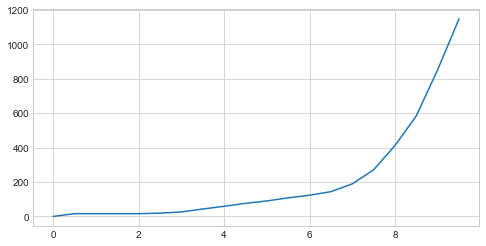

In [225]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(8,4))
ax = plt.axes()
ax.plot(time_interval, num_crash_event)

In [186]:
####### give a threshold of a time interval between two consecutive crashes within one trial #######  
####### how to set up the threshold? 1) how much time it will take to reset the machine??? 

crash_excludeShortT = pd.DataFrame()
for x in range(len(peopleTrialHasCrash)):
    trial = peopleTrialHasCrash[x]
    df = crash_event[crash_event.peopleTrialKey == trial]
    df['seconds_shift'] = df['seconds'].shift(1)
    df.fillna(0, inplace=True)
    df['time_gap'] = df['seconds'] - df['seconds_shift']
    # now we try to set as 2 seconds as a short-time crash
    df = df[df.time_gap > 2]
    crash_excludeShortT = pd.concat([crash_excludeShortT, df])
    
    
#     for i in range(len(df)):
#         sec_1 = df.seconds_shift.iloc[i]
#         sec_2 = df.seconds.iloc[i] 
#         temp = data_needed[ (data_needed.peopleTrialKey == trial ) &\
#          (data_needed.seconds > sec_1) & (data_needed.seconds <= sec_2 ) ] 
#         crash_event_withInfo = pd.concat([crash_event_withInfo,temp])

In [25]:
len(crash_excludeShortT)

6235

In [6]:
crash_excludeShortT.head()

,seconds,trialPhase,currentPosRoll,currentVelRoll,joystickX,peopleName,trialName,peopleTrialKey,datetimeNew,crash,seconds_shift,time_gap
1177,22.398,4,59.436035,94.134567,-0.880920,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1970-01-01 00:00:22.398,0.0,0.000,22.398
2137,35.087,4,-60.455017,-11.415452,0.843781,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1970-01-01 00:00:35.087,1.0,22.398,12.689
4174,71.218,4,-60.578613,2.456897,0.820343,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1970-01-01 00:01:11.218,1.0,35.087,36.131
5255,87.480,4,60.262756,44.052488,-0.579346,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1970-01-01 00:01:27.480,1.0,71.218,16.262
6060,97.565,4,-60.367126,-27.508665,0.796906,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1970-01-01 00:01:37.565,1.0,87.480,10.085


In [207]:
print('There are %s crash events that have less than 7 seconds time interval between next crash'\
      % (len(crash_event) - len(crash_excludeShortT)))

There are 189 crash events that have less than 7 seconds time interval between next crash


In [183]:
print('There are %s crash events that have less than 5 seconds time interval between next crash'\
      % (len(crash_event) - len(crash_excludeShortT)))

There are 90 crash events that have less than 5 seconds time interval between next crash


In [245]:
print('There are %s crash events that have less than 3 seconds time interval between next crash'\
      % (len(crash_event) - len(crash_excludeShortT)))

There are 26 crash events that have less than 3 seconds time interval between next crash


## Checking resampling & interplotation 

### method 1 -- pandas resampling

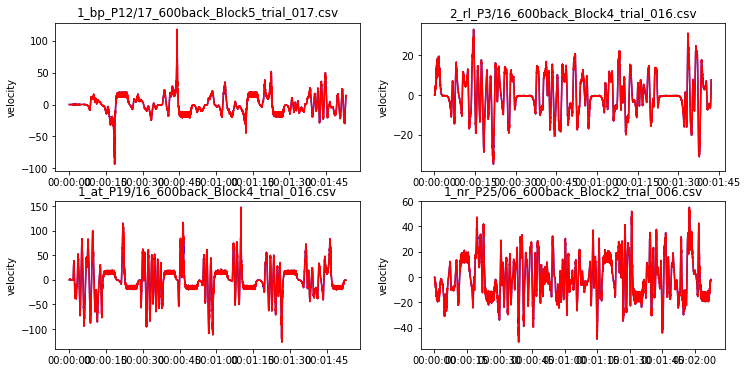

In [350]:
random_path2 = np.random.choice(all_path, size=4, replace=False)

fig, axes = plt.subplots(2,2, figsize=(12,6), squeeze = False)
for i, path in enumerate(random_path2):
    data = data_needed[data_needed.peopleTrialKey == path]
    data = data[['seconds', 'currentPosRoll','currentVelRoll','calculated_vel','joystickX']]
    data_resample = data.resample('0.001S').asfreq().interpolate(method='linear')
    x1 = data.index
    x2 = data_resample.index
    y1 = data.calculated_vel
    y2 = data_resample.calculated_vel
    ax = axes[i//2, i%2]
    ax.plot(x1,y1,color='blue')
    ax.plot(x2,y2,color='red')
    ax.set_title(path)
    ax.set_ylabel("velocity")

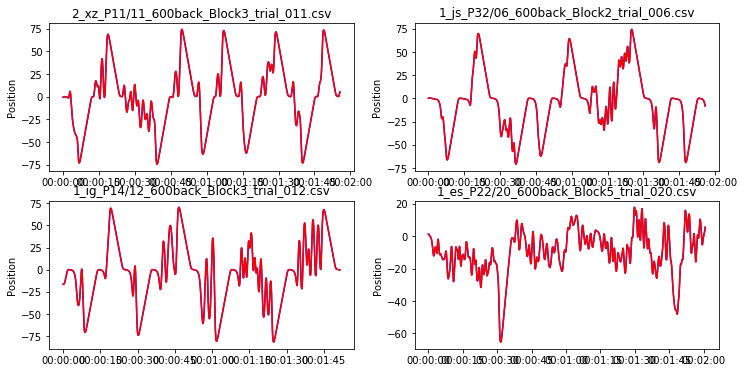

In [351]:
random_path2 = np.random.choice(all_path, size=4, replace=False)

fig, axes = plt.subplots(2,2, figsize=(12,6), squeeze = False)
for i, path in enumerate(random_path2):
    data = data_needed[data_needed.peopleTrialKey == path]
    data = data[['seconds', 'currentPosRoll','currentVelRoll','calculated_vel','joystickX']]
    data_resample = data.resample('0.001S').asfreq().interpolate(method='linear')
    x1 = data.index
    x2 = data_resample.index
    y1 = data.currentPosRoll
    y2 = data_resample.currentPosRoll
    ax = axes[i//2, i%2]
    ax.plot(x1,y1,color='blue')
    ax.plot(x2,y2,color='red')
    ax.set_title(path)
    ax.set_ylabel("Position")

From the above pictures, we can see our resample methods works well. However, the data still gonna be in different length, since  
 e.x.1: from 1.003 seconds to 1.500 seconds, there would be 498 sampling rate;   
 e.x.2: from 1.005 seconds to 1.500 seconds, there would be 496 sampling rate;

### method 2 -- numpy & scipy 

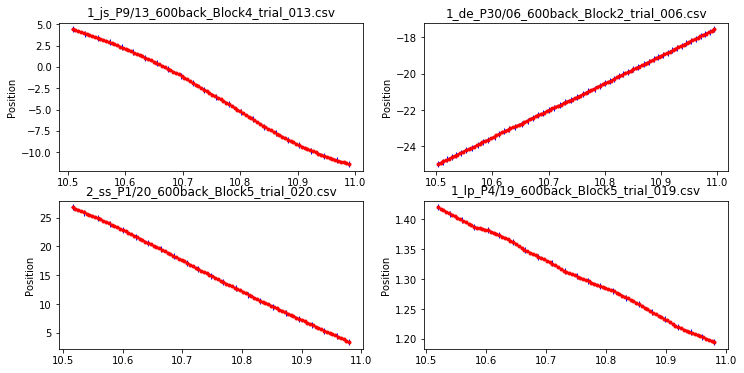

In [358]:
random_path2 = np.random.choice(all_path, size=4, replace=False)

fig, axes = plt.subplots(2,2, figsize=(12,6), squeeze = False)
for i, path in enumerate(random_path2):
    data = data_needed[data_needed.peopleTrialKey == path]
    data = data[['seconds', 'currentPosRoll','currentVelRoll','calculated_vel','joystickX']]
    data = data[(data.index>="1970-01-01 00:00:10.500") & (data.index<="1970-01-01 00:00:11.000")]
    x1 = data.seconds
    y1 = data.currentPosRoll
    new_length = 100
    new_x1 = np.linspace(x1.min(), x1.max(), new_length)
    new_y1 = sp.interpolate.interp1d(x1, y1, kind='linear')(new_x1)
    ax = axes[i//2, i%2]
    ax.plot(x1, y1, marker = '|', color='blue')
    ax.plot(new_x1, new_y1, marker = '.', color='red')
    ax.set_title(path)
    ax.set_ylabel("Position")

57
24
25
24


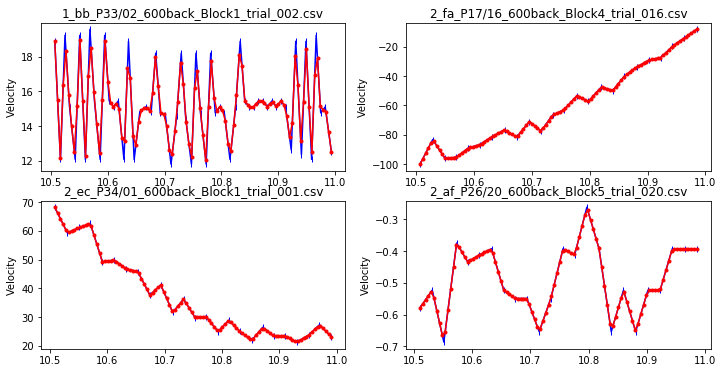

In [359]:
random_path2 = np.random.choice(all_path, size=4, replace=False)

fig, axes = plt.subplots(2,2, figsize=(12,6), squeeze = False)
for i, path in enumerate(random_path2):
    data = data_needed[data_needed.peopleTrialKey == path]
    data = data[['seconds', 'currentPosRoll','currentVelRoll','calculated_vel','joystickX']]
    data = data[(data.index>="1970-01-01 00:00:10.500") & (data.index<="1970-01-01 00:00:11.000")]
    x1 = data.seconds
    y1 = data.calculated_vel
    print(len(y1))
    new_length = 100
    new_x1 = np.linspace(x1.min(), x1.max(), new_length)
    new_y1 = sp.interpolate.interp1d(x1, y1, kind='linear')(new_x1)
    ax = axes[i//2, i%2]
    ax.plot(x1, y1, marker = '|', color='blue')
    ax.plot(new_x1, new_y1, marker = '.', color='red')
    ax.set_title(path)
    ax.set_ylabel("Velocity")

This method works very well too! And one benefit of this is that we could make the sampling rate fixed. So I decided to use this method while do feature engineering.

## Get the crash event label and features

In [412]:
# np.set_printoptions(suppress=True)
# ####### crash event data info with features within 300 ms previous data ######
# time_scale_train = 0.5
# time_ahead = 0.3
# sampling_rate = 100
# crash_feature_label_300ms_500ms_test = pd.DataFrame()
# peopleTrialHasCrash_ex = crash_excludeShortT.peopleTrialKey.unique()
# for num in range(len(peopleTrialHasCrash)):
#     j = peopleTrialHasCrash[num]
#     print(num)
#     for i in (crash_excludeShortT.loc[
#                         ((crash_excludeShortT['peopleTrialKey'] == j)),'seconds']):
        
#         temp_df = pd.concat([data_needed[(data_needed.seconds <= i - time_ahead) &\
#                         (data_needed.seconds >= i - time_scale_train - time_ahead) \
#                       &(data_needed['peopleTrialKey'] == j)]]) 
        
#         ##### resample & interpolate
#         temp_df = temp_df[['seconds', 'currentPosRoll','calculated_vel','joystickX','peopleTrialKey']]
#         x = temp_df.seconds
#         y_calculated_vel = temp_df.calculated_vel
#         y_currentPosRoll = temp_df.currentPosRoll
#         y_joystickX = temp_df.joystickX
        
#         new_x = np.linspace(x.min(), x.max(), sampling_rate)
#         new_y_calculated_vel = sp.interpolate.interp1d(x, y_calculated_vel, kind='linear')(new_x)
#         new_y_currentPosRoll = sp.interpolate.interp1d(x, y_currentPosRoll, kind='linear')(new_x)
#         new_y_joystickX = sp.interpolate.interp1d(x, y_joystickX, kind='linear')(new_x)
        
        

#         arr1 = np.dstack([new_y_calculated_vel, new_y_currentPosRoll, new_y_joystickX]).reshape(sampling_rate,3)
#         arr2 = 1
#         arr3 = temp_df['peopleTrialKey'].iloc[0]
#         arr4 = temp_df['seconds'].iloc[0]
#         arr5 = temp_df['seconds'].iloc[-1]
        
#         crash_feature_label_300ms_500ms_test = pd.concat(\
#                             [crash_feature_label_300ms_500ms_test, pd.DataFrame([[arr1, arr2, arr3, arr4, arr5]],\
#                             columns=["features",'label', 'peopleTrialKey', 'start_seconds', 'end_seconds']) ])                           

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [6]:
# crash_feature_label_300ms_500ms_test.to_pickle('crash_feature_label_300ms_500ms_test')
crash_feature_label_300ms_500ms = pd.read_pickle('crash_feature_label_300ms_500ms_test')
crash_feature_label_300ms_500ms.head()

,features,label,peopleTrialKey,start_seconds,end_seconds
0,"[[-28.464577414774713, 51.1962890625, -0.34918...",1,1_co_P13/12_600back_Block3_trial_012.csv,21.600,22.098
0,"[[-50.811767578117056, -33.7417602539063, 0.64...",1,1_co_P13/12_600back_Block3_trial_012.csv,34.298,34.780
0,"[[0.2496892755681186, -34.5712280273438, 0.054...",1,1_co_P13/12_600back_Block3_trial_012.csv,70.438,70.917
0,"[[-4.970005580356955, 48.592529296875, -0.5475...",1,1_co_P13/12_600back_Block3_trial_012.csv,86.681,87.162
0,"[[-12.425013950898427, -36.5240478515625, 0.32...",1,1_co_P13/12_600back_Block3_trial_012.csv,96.783,97.265


In [417]:
len(crash_feature_label_300ms_500ms)

6235

In [416]:
leng = []
for i in range(len(crash_feature_label_300ms_500ms)):
    leng.append(crash_feature_label_300ms_500ms.features.iloc[i].shape[0])
set(leng)

{100}

I found that all the sampling rates are the same for each case, bingo!

In [12]:
#### Check the length distribution of series
len_distribution = []
for i in range(len(crash_feature_label_300ms_500ms)):
    len_distribution.append(crash_feature_label_300ms_500ms.features.iloc[i].shape)
tmp = pd.Series(len_distribution)
tmp.describe()

count        6251
unique          5
top       (24, 4)
freq         4432
dtype: object

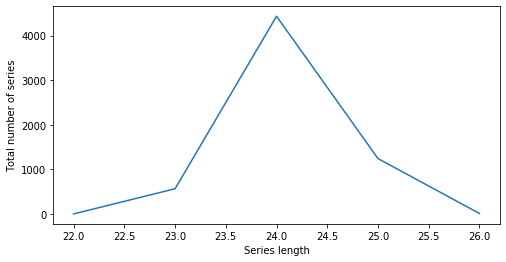

In [26]:
unique_pair = set(tmp)
num_pair = {}
for i in unique_pair:
    num_pair[i[0]]= sum((tmp.isin([i])))
num_pair


lists = sorted(num_pair.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples

fig = plt.figure(figsize=(8,4))
plt.plot(x, y)
plt.xlabel('Series length')
plt.ylabel('Total number of series')
plt.show() ### sampling rate 

## Get all non crash event with label and features

In [27]:
####### define my own sliding window function
def sliding_window(data, buck_size, step):
    list_all = []
    temp_len = len(data[data.between(data.iloc[0], data.iloc[0] + buck_size)])
    for i in range(len(data)): 
        left = data.iloc[i] + i * step 
        right = data.iloc[i] + i * step  + buck_size
        series1 = data[data.between(left, right)] 
        if data.iloc[-1] - left < 0.5:
            break
        list_all.append(series1)
    return list_all

In [427]:
# np.set_printoptions(suppress=True)
# ####### crash event data info with features within 0.5 second previous data ######
# time_scale_train = 0.5
# time_ahead = 0.3
# machine_reset_time = 0.3
# time_step = 0.3
# sampling_rate = 100
# peopleTrialHasCrash_ex = crash_excludeShortT.peopleTrialKey.unique()

# noncrash_feature_label_300ms_500ms_test = pd.DataFrame()
# for num in range(len(peopleTrialHasCrash_ex)):
#     j = peopleTrialHasCrash_ex[num]
#     print(num) 
#     df = crash_excludeShortT[crash_excludeShortT.peopleTrialKey == j]
#     df['seconds_shift'] = df['seconds'].shift(1)
#     df.fillna(0, inplace=True)
#     df['time_gap'] = df['seconds'] - df['seconds_shift']
    
#     df_trial = data_needed[(data_needed['peopleTrialKey'] == j)]

#     for i in (crash_excludeShortT.loc[
#                         (crash_excludeShortT['peopleTrialKey'] == j),'seconds']):
#         left = df.seconds_shift[df.seconds==i].iloc[0] + machine_reset_time
#         right = i - time_scale_train - time_ahead
#         noncrash_time_range = [left, right]

#         temp_serie = data_needed.loc[(data_needed.seconds>=left) & (data_needed.seconds<=right) \
#                       &(data_needed['peopleTrialKey'] == j),'seconds'] 
        
#         list_all = sliding_window(temp_serie, time_scale_train, time_step) 

        
#         for x in range(len(list_all)):
#             temp_df = df_trial[(df_trial.seconds >= list_all[x].iloc[0])\
#                            & (df_trial.seconds <= list_all[x].iloc[-1])]
    
#             ##### resample & interpolate
#             temp_df = temp_df[['seconds', 'currentPosRoll','calculated_vel','joystickX','peopleTrialKey']]
#             x = temp_df.seconds
#             y_calculated_vel = temp_df.calculated_vel
#             y_currentPosRoll = temp_df.currentPosRoll
#             y_joystickX = temp_df.joystickX

#             new_x = np.linspace(x.min(), x.max(), sampling_rate)
#             new_y_calculated_vel = sp.interpolate.interp1d(x, y_calculated_vel, kind='linear')(new_x)
#             new_y_currentPosRoll = sp.interpolate.interp1d(x, y_currentPosRoll, kind='linear')(new_x)
#             new_y_joystickX = sp.interpolate.interp1d(x, y_joystickX, kind='linear')(new_x)



#             arr1 = np.dstack([new_y_calculated_vel, new_y_currentPosRoll, new_y_joystickX]).reshape(sampling_rate,3)
#             arr2 = 0
#             arr3 = temp_df['peopleTrialKey'].iloc[0]
#             arr4 = temp_df['seconds'].iloc[0]
#             arr5 = temp_df['seconds'].iloc[-1]
        
#             noncrash_feature_label_300ms_500ms_test = pd.concat(\
#                             [noncrash_feature_label_300ms_500ms_test, pd.DataFrame([[arr1, arr2, arr3, arr4, arr5]],\
#                             columns=["features",'label', 'peopleTrialKey', 'start_seconds', 'end_seconds']) ]) 
  






            
            
#             arr1 = np.array(temp_df[['seconds', 'currentPosRoll','currentVelRoll','joystickX']])
#             arr2 = 0
#             arr3 = temp_df['peopleTrialKey'].iloc[0]
#             arr4 = temp_df['seconds'].iloc[0]
#             arr5 = temp_df['seconds'].iloc[-1]
#             noncrash_feature_label_300ms_500ms_test = pd.concat(\
#                             [noncrash_feature_label_300ms_500ms_test, pd.DataFrame([[arr1, arr2]],\
#                             columns=["features",'label']) ]) 
            
#           temp_df =  pd.concat([
#                           df_trial[(df_trial.seconds >= list_all[x].iloc[0])\
#                            & (df_trial.seconds <= list_all[x].iloc[-1])]\
#                             for x in range(len(list_all)) ] )
            
        
        

# #         print(noncrash_time_range, temp_serie.index)
#         temp_df = pd.concat([data_needed[(data_needed.seconds <= i - time_scale_train - time_ahead) &\
#                         (data_needed.seconds_shift >= i - time_gap - time_ahead) \
#                       &(data_needed['peopleTrialKey'] == j)]]) 

#         arr1 = np.array(temp_df[['seconds', 'currentPosRoll','currentVelRoll','joystickX']])
# #         arr2 = np.array(temp_df['crash'].iloc[-1])
#         arr2 = 0
# #         arr3 = np.mean(np.array(temp_df[['seconds']]))
# #         arr4 = np.mean(np.array(temp_df[['currentPosRoll']]))
# #         arr5 = np.mean(np.array(temp_df[['currentVelRoll']]))
# #         arr6 = np.mean(np.array(temp_df[['joystickX']]))
# #         arr7 = np.std(np.array(temp_df[['currentPosRoll']]))
#         noncrash_feature_label_300ms_500ms = pd.concat(\
#                             [noncrash_feature_label_300ms_500ms, pd.DataFrame([[arr1, arr2]],\
#                             columns=["features",'label']) ])                           

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [7]:
# noncrash_feature_label_300ms_500ms_test.to_pickle('noncrash_feature_label_300ms_500ms_test')
noncrash_feature_label_300ms_500ms = pd.read_pickle('noncrash_feature_label_300ms_500ms_test')
noncrash_feature_label_300ms_500ms.head()

,features,label,peopleTrialKey,start_seconds,end_seconds
0,"[[2.1362304687444715, -15.0430297851563, -0.0]...",0,1_co_P13/12_600back_Block3_trial_012.csv,0.304,0.803
0,"[[9.460449218744465, -13.4225463867188, -0.0],...",0,1_co_P13/12_600back_Block3_trial_012.csv,0.615,1.112
0,"[[10.711669921874991, -9.89593505859375, -0.0]...",0,1_co_P13/12_600back_Block3_trial_012.csv,0.933,1.422
0,"[[12.08496093749999, -5.6304931640625, -0.0], ...",0,1_co_P13/12_600back_Block3_trial_012.csv,1.238,1.730
0,"[[8.739124644886092, -2.25494384765625, -0.0],...",0,1_co_P13/12_600back_Block3_trial_012.csv,1.543,2.032


In [431]:
len(noncrash_feature_label_300ms_500ms)

309792

In [429]:
leng2 = []
for i in range(len(noncrash_feature_label_300ms_500ms)):
    leng2.append(noncrash_feature_label_300ms_500ms.features.iloc[i].shape[0])
set(leng2)

{100}

In [8]:
data_final = pd.concat([crash_feature_label_300ms_500ms, noncrash_feature_label_300ms_500ms])
data_final = data_final[['features','label']]
data_final.head()

,features,label
0,"[[-28.464577414774713, 51.1962890625, -0.34918...",1
0,"[[-50.811767578117056, -33.7417602539063, 0.64...",1
0,"[[0.2496892755681186, -34.5712280273438, 0.054...",1
0,"[[-4.970005580356955, 48.592529296875, -0.5475...",1
0,"[[-12.425013950898427, -36.5240478515625, 0.32...",1


## LSTM Model 

In [9]:
from keras.preprocessing import sequence
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

from sklearn.model_selection import train_test_split

In [10]:
X = data_final.features
X = np.array([np.vstack(i) for i in X])
y = np.array(data_final.label)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((252821, 100, 3), (252821,), (63206, 100, 3), (63206,))

In [11]:
X_train = sequence.pad_sequences(X_train, maxlen=100, padding='post', dtype='float', truncating='post')
y_train = np.array(y_train).reshape(len(y_train),1)

X_test = sequence.pad_sequences(X_test, maxlen=100, padding='post', dtype='float', truncating='post')
y_test = np.array(y_test).reshape(len(y_test),1)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((252821, 100, 3), (252821, 1), (63206, 100, 3), (63206, 1))

In [12]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
enc = enc.fit(y_train)
y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

In [13]:
### train model
import keras
model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
      keras.layers.LSTM(
          units=128,
          input_shape=[X_train.shape[1], X_train.shape[2]]
      )
    )
)
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(y_train.shape[1], activation='softmax'))
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['categorical_accuracy']
)

In [ ]:
class_weights ={
    0:1,
    1:1
}

history = model.fit(
    X_train, y_train,
    epochs=1,
    batch_size=32,
    validation_split=0.1,
    shuffle=False,
    class_weight = class_weights
)

3933/7111 [===============>..............] - ETA: 4:42 - loss: 0.0332 - categorical_accuracy: 0.9866

In [510]:
model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

1976/1976 [==============================] - 64s 32ms/step - loss: 0.1641 - categorical_accuracy: 0.9195


In [511]:
predictions = y_pred[:,0]
predictions[predictions>=0.5] = 1
predictions[predictions<0.5] = 0

testing = y_test[:,0]

len(predictions), len(testing)
# an_array = np.where(an_array > 20, 0, an_array)

(63206, 63206)

In [512]:
from sklearn.metrics import confusion_matrix
cf_array = confusion_matrix(testing, predictions)

In [513]:
len(y_test[y_test[:,0]==0])

1274

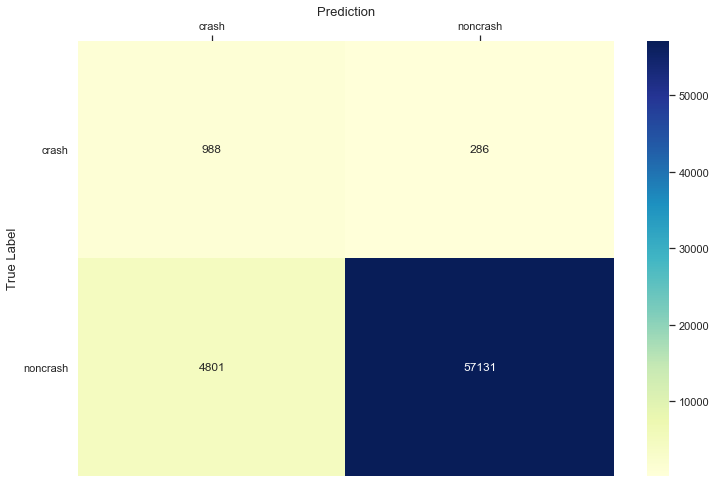

In [514]:
import seaborn as sns
sns.set()
df_cm = pd.DataFrame(cf_array, index = ['crash', 'noncrash'],
                  columns = ['crash', 'noncrash'])
plt.figure(figsize = (12,8))
ax = sns.heatmap(df_cm, annot=True, fmt="d",cmap="YlGnBu")
plt.title('Prediction', fontsize = 13)
plt.yticks(rotation=0)
plt.ylabel('True Label', fontsize = 13)
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')

In [515]:
(988)/(988+286)

0.7755102040816326

In [516]:
988/(988+4801)

0.17066850924166524

In [177]:
xx = data_needed[(data_needed['peopleTrialKey'] == '1_co_P13/12_600back_Block3_trial_012.csv')]
temp_df = xx[(xx.seconds >= 0.5)\
                           & (xx.seconds <= 1.0)]
temp_df = temp_df[['seconds', 'currentPosRoll','currentVelRoll','joystickX']]
temp_df = temp_df.resample('0.001S').asfreq().interpolate(method='linear')
temp_df

,seconds,currentPosRoll,currentVelRoll,joystickX
datetimeNew,,,,
1970-01-01 00:00:00.508,0.508,-14.191589,9.827589,0.0
1970-01-01 00:00:00.509,0.509,-14.186096,9.849047,0.0
1970-01-01 00:00:00.510,0.510,-14.180603,9.870504,0.0
1970-01-01 00:00:00.511,0.511,-14.175110,9.891962,0.0
1970-01-01 00:00:00.512,0.512,-14.169617,9.913419,0.0
...,...,...,...,...
1970-01-01 00:00:00.993,0.993,-9.074097,15.004239,0.0
1970-01-01 00:00:00.994,0.994,-9.061890,15.004239,0.0
1970-01-01 00:00:00.995,0.995,-9.049683,15.004239,0.0


In [197]:
noncrash_feature_label_300ms_500ms_test.features.iloc[12].shape


(481, 4)

In [195]:
noncrash_feature_label_300ms_500ms_test

,features,label
0,"[[0.304, -15.0430297851563, 5.536065, -0.0], [...",0
0,"[[0.615, -13.4225463867188, 12.187927, -0.0], ...",0
0,"[[0.933, -9.89593505859375, 15.004239000000002...",0
0,"[[1.238, -5.6304931640625, 11.249156, -0.0], [...",0
0,"[[1.543, -2.25494384765625, 4.5972940000000015...",0
...,...,...
0,"[[102.012, 32.4041748046875, 14.746747, -0.626...",0
0,"[[102.324, 37.4221801757813, -5.57898000000000...",0
0,"[[102.637, 37.1200561523438, -7.896403, -0.436...",0
0,"[[102.954, 34.9200439453125, 4.479278, -0.0158...",0


In [196]:
test = []
for i in range(len(noncrash_feature_label_300ms_500ms_test)):
    if noncrash_feature_label_300ms_500ms_test.features.iloc[i].shape[0] > 50:
        tmp_df = noncrash_feature_label_300ms_500ms_test.iloc[i:i+1, :]
    test.append(tmp_df)
test_all = pd.concat(test, ignore_index=True)
test_all

,features,label
0,"[[0.304, -15.0430297851563, 5.536065, -0.0], [...",0
1,"[[0.615, -13.4225463867188, 12.187927, -0.0], ...",0
2,"[[0.933, -9.89593505859375, 15.004239000000002...",0
3,"[[1.238, -5.6304931640625, 11.249156, -0.0], [...",0
4,"[[1.543, -2.25494384765625, 4.5972940000000015...",0
...,...,...
892,"[[102.012, 32.4041748046875, 14.746747, -0.626...",0
893,"[[102.324, 37.4221801757813, -5.57898000000000...",0
894,"[[102.637, 37.1200561523438, -7.896403, -0.436...",0
895,"[[102.954, 34.9200439453125, 4.479278, -0.0158...",0


In [74]:
test_all.to_csv('50over_sampling_rate_example.csv')

In [150]:
test_all

,features,label,Key,seconds_start,seconds_end
0,"[[0.304, -15.0430297851563, 5.536065, 0.0], [0...",0,1_co_P13/12_600back_Block3_trial_012.csv,0.304,0.803
1,"[[0.615, -13.4225463867188, 12.187927, 0.0], [...",0,1_co_P13/12_600back_Block3_trial_012.csv,0.615,1.112
2,"[[0.933, -9.89593505859375, 15.004239000000002...",0,1_co_P13/12_600back_Block3_trial_012.csv,0.933,1.422
3,"[[1.238, -5.6304931640625, 11.249156, 0.0], [1...",0,1_co_P13/12_600back_Block3_trial_012.csv,1.238,1.730
4,"[[1.238, -5.6304931640625, 11.249156, 0.0], [1...",0,1_co_P13/12_600back_Block3_trial_012.csv,1.238,1.730
...,...,...,...,...,...
892,"[[96.754, -6.40228271484375, 12.02163, 0.0], [...",0,1_co_P13/06_600back_Block2_trial_006.csv,96.754,97.251
893,"[[96.754, -6.40228271484375, 12.02163, 0.0], [...",0,1_co_P13/06_600back_Block2_trial_006.csv,96.754,97.251
894,"[[96.754, -6.40228271484375, 12.02163, 0.0], [...",0,1_co_P13/06_600back_Block2_trial_006.csv,96.754,97.251
895,"[[96.754, -6.40228271484375, 12.02163, 0.0], [...",0,1_co_P13/06_600back_Block2_trial_006.csv,96.754,97.251


In [2]:
# noncrash_feature_label_300ms_500ms.to_pickle('noncrash_feature_label_300ms_500ms')
noncrash_feature_label_300ms_500ms = pd.read_pickle('noncrash_feature_label_300ms_500ms')
noncrash_feature_label_300ms_500ms.head()

,features,label
0,"[[0.304, -15.0430297851563, 5.536065, -0.0], [...",0
0,"[[0.615, -13.4225463867188, 12.187927, -0.0], ...",0
0,"[[0.933, -9.89593505859375, 15.004239000000002...",0
0,"[[1.238, -5.6304931640625, 11.249156, -0.0], [...",0
0,"[[1.543, -2.25494384765625, 4.5972940000000015...",0


In [29]:
len(noncrash_feature_label_300ms_500ms)

309792

In [33]:
len_distribution_noncrash = []
for i in range(len(noncrash_feature_label_300ms_500ms)):
    len_distribution_noncrash.append(noncrash_feature_label_300ms_500ms.features.iloc[i].shape)
tmp_noncrash = pd.Series(len_distribution_noncrash)
tmp_noncrash.describe()

count      309792
unique         45
top       (24, 4)
freq       138468
dtype: object

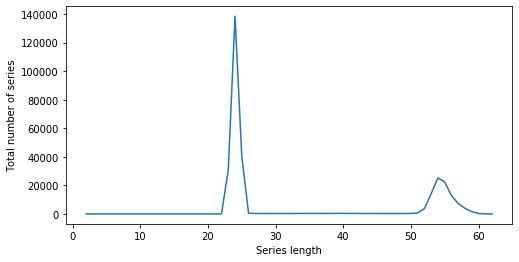

In [36]:
unique_pair = set(tmp_noncrash)
num_pair_non = {}
for i in unique_pair:
    num_pair_non[i[0]]= sum((tmp_noncrash.isin([i])))

import matplotlib.pylab as plt
lists = sorted(num_pair_non.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples

fig = plt.figure(figsize=(8,4))
plt.plot(x, y)
plt.xlabel('Series length')
plt.ylabel('Total number of series') 
plt.show() ##### why this happen sampling rate 50 - 60 

In [15]:
noncrash_feature_label_300ms_500ms.head()

,features,label
0,"[[0.304, -15.0430297851563, 5.536065, -0.0], [...",0
0,"[[0.615, -13.4225463867188, 12.187927, -0.0], ...",0
0,"[[0.933, -9.89593505859375, 15.004239000000002...",0
0,"[[1.238, -5.6304931640625, 11.249156, -0.0], [...",0
0,"[[1.543, -2.25494384765625, 4.5972940000000015...",0


In [ ]:
for i in range(len(noncrash_feature_label_300ms_500ms)):
    noncrash_feature_label_300ms_500ms[noncrash_feature_label_300ms_500ms.features.iloc[i].shape[0]]

In [18]:
noncrash_feature_label_300ms_500ms.features.iloc[1].shape[0]

55

### First try the fixed time series length = 24 for both crash/noncrash event

In [145]:
def find_length(data):
    return data.shape[0]

In [146]:
##### find the crash events with 24 time series length
crash_feature_label_300ms_500ms['series_length'] = crash_feature_label_300ms_500ms['features'].apply(find_length)

crash_fixed_length  = crash_feature_label_300ms_500ms[crash_feature_label_300ms_500ms.series_length==24]
len(crash_fixed_length)

4432

In [147]:
##### find the noncrash events with 24 time series length
noncrash_feature_label_300ms_500ms['series_length'] = noncrash_feature_label_300ms_500ms['features'].apply(find_length)
noncrash_fixed_length  = noncrash_feature_label_300ms_500ms[noncrash_feature_label_300ms_500ms.series_length==24]
len(noncrash_fixed_length)

138468

In [6]:
##### concat both data sets for training
final_data = pd.concat([crash_fixed_length, noncrash_fixed_length])
final_data['label'] = final_data['label'].apply(str) 
# final_data['label'] = pd.get_dummies(final_data['label']).values
final_data.head()

,features,label,series_length
0,"[[34.298, -33.7417602539063, -39.396185, -0.64...",1,24
0,"[[70.438, -34.5712280273438, -29.26819, -0.054...",1,24
0,"[[86.681, 48.592529296875, -2.875321, 0.547577...",1,24
0,"[[96.783, -36.5240478515625, -12.187927, -0.32...",1,24
0,"[[52.792, -50.5014038085938, 4.109134, -0.5312...",1,24


Since we found the data is imbalanced, so I first decided to sample among noncrash event 

In [148]:
df1 = final_data[final_data.label=='1']
df2 = final_data[final_data.label=='0'].sample(n=len(df1), random_state=1)
df3 = pd.concat([df1, df2])
len(df3)

8864

In [149]:
##### train and test data sets split
from sklearn.model_selection import train_test_split
X = df3.features
X = np.array([np.vstack(i) for i in X])
y = np.array(df3.label)
X.shape

(8864, 24, 4)

In [ ]:
# Y = pd.get_dummies(final_data['label']).values
# print('Shape of label tensor:', Y.shape)

### Model

In [15]:
from keras.preprocessing import sequence
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import numpy as np
import pandas as pd

from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

In [100]:
df1 = final_data[final_data.label=='1']
df2 = final_data[final_data.label=='0'].sample(n=4432, random_state=1)
df3 = pd.concat([df1, df2])
len(df3)

8864

In [150]:
from sklearn.model_selection import train_test_split
X = df3.features
X = np.array([np.vstack(i) for i in X])
y = np.array(df3.label)
X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7091, 24, 4), (7091,), (1773, 24, 4), (1773,))

In [151]:
# X_train = np.array(X_train).reshape(len(X_train),1)
y_train = np.array(y_train).reshape(len(y_train),1)
# X_test = np.array(X_test).reshape(len(X_test),1)
y_test = np.array(y_test).reshape(len(y_test),1)

X_train = sequence.pad_sequences(X_train, maxlen=24, padding='post', dtype='float', truncating='post')
# y_train = sequence.pad_sequences(y_train, maxlen=1, padding='post', dtype='float', truncating='post')
X_test = sequence.pad_sequences(X_test, maxlen=24, padding='post', dtype='float', truncating='post')
# y_test = sequence.pad_sequences(y_test, maxlen=1, padding='post', dtype='float', truncating='post')
X_test.shape, y_test.shape

((1773, 24, 4), (1773, 1))

In [152]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
enc = enc.fit(y_train)
y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

In [153]:
### train model
import keras
model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
      keras.layers.LSTM(
          units=128,
          input_shape=[X_train.shape[1], X_train.shape[2]]
      )
    )
)
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(y_train.shape[1], activation='softmax'))
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['categorical_accuracy']
)

In [154]:
class_weight ={
    0:1,
    1:10
}
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=32,
    validation_split=0.1,
    shuffle=False,
    class_weight = 
)

Epoch 1/15
200/200 [==============================] - 6s 28ms/step - loss: 0.1840 - categorical_accuracy: 0.9278 - val_loss: 0.1061 - val_categorical_accuracy: 0.9634
Epoch 2/15
200/200 [==============================] - 5s 25ms/step - loss: 0.0802 - categorical_accuracy: 0.9740 - val_loss: 0.1013 - val_categorical_accuracy: 0.9676
Epoch 3/15
200/200 [==============================] - 5s 25ms/step - loss: 0.0639 - categorical_accuracy: 0.9790 - val_loss: 0.0953 - val_categorical_accuracy: 0.9704
Epoch 4/15
200/200 [==============================] - 5s 25ms/step - loss: 0.0452 - categorical_accuracy: 0.9848 - val_loss: 0.0708 - val_categorical_accuracy: 0.9775
Epoch 5/15
200/200 [==============================] - 5s 24ms/step - loss: 0.0464 - categorical_accuracy: 0.9845 - val_loss: 0.0455 - val_categorical_accuracy: 0.9831
Epoch 6/15
200/200 [==============================] - 5s 23ms/step - loss: 0.0307 - categorical_accuracy: 0.9911 - val_loss: 0.0400 - val_categorical_accuracy: 0.987

In [155]:
model.evaluate(X_test, y_test)

56/56 [==============================] - 0s 7ms/step - loss: 0.0211 - categorical_accuracy: 0.9938


[0.021135224029421806, 0.9937958121299744]

In [156]:
y_pred

array([[9.9999988e-01, 1.6012771e-07],
       [9.9999774e-01, 2.2549912e-06],
       [9.9999952e-01, 4.2241402e-07],
       ...,
       [9.9999189e-01, 8.1015442e-06],
       [7.8125493e-05, 9.9992192e-01],
       [1.0000000e+00, 2.1751786e-08]], dtype=float32)

Questions:   
           1) how to deal with those events with different time length    
           2) how to deal with the imbalanced data, under-sampling?   
           3) why the accuracy is so high? I guess is because the time scale we get.   

In [ ]:
4432 4432 

## Below is draft

In [98]:
import pandas as pd
index1 = pd.date_range('1/1/2000', periods=9, freq='S')
series1 = pd.Series(range(9), index=index1)
series1 = pd.DataFrame(series1)
series1['pos'] = [x for x in range(10,19)]
series1

,0,pos
2000-01-01 00:00:00,0,10
2000-01-01 00:00:01,1,11
2000-01-01 00:00:02,2,12
2000-01-01 00:00:03,3,13
2000-01-01 00:00:04,4,14
2000-01-01 00:00:05,5,15
2000-01-01 00:00:06,6,16
2000-01-01 00:00:07,7,17
2000-01-01 00:00:08,8,18


In [86]:
index2 = pd.date_range('1/1/2000', periods=5, freq='S')
series2 = pd.Series(range(5), index=index2)
series2

2000-01-01 00:00:00    0
2000-01-01 00:00:01    1
2000-01-01 00:00:02    2
2000-01-01 00:00:03    3
2000-01-01 00:00:04    4
Freq: S, dtype: int64

In [117]:
a = series1.resample('0.5S').asfreq().interpolate(method='linear').iloc[2:11, :]
b = pd.DataFrame(series2)
a

,0,pos
2000-01-01 00:00:01.000,1.0,11.0
2000-01-01 00:00:01.500,1.5,11.5
2000-01-01 00:00:02.000,2.0,12.0
2000-01-01 00:00:02.500,2.5,12.5
2000-01-01 00:00:03.000,3.0,13.0
2000-01-01 00:00:03.500,3.5,13.5
2000-01-01 00:00:04.000,4.0,14.0
2000-01-01 00:00:04.500,4.5,14.5
2000-01-01 00:00:05.000,5.0,15.0


In [119]:
aa = a.resample('0.5S').asfreq().interpolate(method='linear')
len(aa)

9

In [120]:
bb=b.resample('0.5S').asfreq().interpolate(method='linear')
len(bb)

9

In [121]:
series1.resample('30S').pad()[0:5]

,0,pos
2000-01-01,0,10


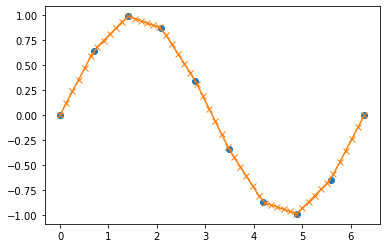

In [215]:
x = np.linspace(0, 2*np.pi, 10)
y = np.sin(x)
xvals = np.linspace(0, 2*np.pi, 50)
yinterp = np.interp(xvals, x, y)
import matplotlib.pyplot as plt
plt.plot(x, y, 'o')

plt.plot(xvals, yinterp, '-x')
plt.show()

In [216]:
x

array([0.        , 0.6981317 , 1.3962634 , 2.0943951 , 2.7925268 ,
       3.4906585 , 4.1887902 , 4.88692191, 5.58505361, 6.28318531])

In [217]:
y

array([ 0.        ,  0.64278761,  0.98480775,  0.8660254 ,  0.34202014,
       -0.34202014, -0.8660254 , -0.98480775, -0.64278761, -0.        ])

In [218]:
xvals

array([0.        , 0.12822827, 0.25645654, 0.38468481, 0.51291309,
       0.64114136, 0.76936963, 0.8975979 , 1.02582617, 1.15405444,
       1.28228272, 1.41051099, 1.53873926, 1.66696753, 1.7951958 ,
       1.92342407, 2.05165235, 2.17988062, 2.30810889, 2.43633716,
       2.56456543, 2.6927937 , 2.82102197, 2.94925025, 3.07747852,
       3.20570679, 3.33393506, 3.46216333, 3.5903916 , 3.71861988,
       3.84684815, 3.97507642, 4.10330469, 4.23153296, 4.35976123,
       4.48798951, 4.61621778, 4.74444605, 4.87267432, 5.00090259,
       5.12913086, 5.25735913, 5.38558741, 5.51381568, 5.64204395,
       5.77027222, 5.89850049, 6.02672876, 6.15495704, 6.28318531])

In [219]:
yinterp

array([ 0.        ,  0.11806303,  0.23612606,  0.35418909,  0.47225212,
        0.59031515,  0.67768762,  0.74050765,  0.80332768,  0.8661477 ,
        0.92896773,  0.98238362,  0.96056646,  0.93874929,  0.91693212,
        0.89511496,  0.87329779,  0.80186149,  0.70561563,  0.60936977,
        0.5131239 ,  0.41687804,  0.31410013,  0.18846008,  0.06282003,
       -0.06282003, -0.18846008, -0.31410013, -0.41687804, -0.5131239 ,
       -0.60936977, -0.70561563, -0.80186149, -0.87329779, -0.89511496,
       -0.91693212, -0.93874929, -0.96056646, -0.98238362, -0.92896773,
       -0.8661477 , -0.80332768, -0.74050765, -0.67768762, -0.59031515,
       -0.47225212, -0.35418909, -0.23612606, -0.11806303, -0.        ])

In [80]:
# Xo,yo = oversample.fit_resample(X[:,:,1], y)
# Xo.shape

In [81]:
# Xo

In [66]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler 
import numpy as np 
oversample = RandomOverSampler(sampling_strategy='minority')
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
# X, y = make_classification(n_classes=2, class_sep=2,
#     weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
#     n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(Xo, yo)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({'0': 138468, '1': 4432})
Resampled dataset shape Counter({'1': 138468, '0': 138468})


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
len(y_train[:,0:1][y_train[:,0:1] == 1])

3548

In [132]:
len(y_train)

7091

In [106]:
# X_train = np.array(X_train).reshape(len(X_train),1)
y_train = np.array(y_train).reshape(len(y_train),1)
# X_test = np.array(X_test).reshape(len(X_test),1)
y_test = np.array(y_test).reshape(len(y_test),1)

X_train = sequence.pad_sequences(X_train, maxlen=24, padding='post', dtype='float', truncating='post')
# y_train = sequence.pad_sequences(y_train, maxlen=1, padding='post', dtype='float', truncating='post')
X_test = sequence.pad_sequences(X_test, maxlen=24, padding='post', dtype='float', truncating='post')
# y_test = sequence.pad_sequences(y_test, maxlen=1, padding='post', dtype='float', truncating='post')
X_test.shape, y_test.shape

((1773, 24, 4), (1773, 1))

In [107]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
enc = enc.fit(y_train)
y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

In [109]:
X_train.shape[1], X_train.shape[2], y_train.shape[1]

(24, 4, 2)

In [110]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7091, 24, 4), (7091, 2), (1773, 24, 4), (1773, 2))

In [142]:
import keras
model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
      keras.layers.LSTM(
          units=128,
          input_shape=[X_train.shape[1], X_train.shape[2]]
      )
    )
)
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(y_train.shape[1], activation='softmax'))
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['categorical_accuracy']
)
# BinaryCrossentropy
# categorical_crossentropy 

In [143]:
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)

Epoch 1/15
200/200 [==============================] - 5s 26ms/step - loss: 0.1802 - categorical_accuracy: 0.9312 - val_loss: 0.0842 - val_categorical_accuracy: 0.9718
Epoch 2/15
200/200 [==============================] - 5s 25ms/step - loss: 0.0772 - categorical_accuracy: 0.9749 - val_loss: 0.0811 - val_categorical_accuracy: 0.9746
Epoch 3/15
200/200 [==============================] - 5s 25ms/step - loss: 0.0644 - categorical_accuracy: 0.9776 - val_loss: 0.0629 - val_categorical_accuracy: 0.9789
Epoch 4/15
200/200 [==============================] - 4s 22ms/step - loss: 0.0483 - categorical_accuracy: 0.9829 - val_loss: 0.0391 - val_categorical_accuracy: 0.9873
Epoch 5/15
200/200 [==============================] - 5s 24ms/step - loss: 0.0383 - categorical_accuracy: 0.9862 - val_loss: 0.0537 - val_categorical_accuracy: 0.9859
Epoch 6/15
200/200 [==============================] - 5s 23ms/step - loss: 0.0363 - categorical_accuracy: 0.9884 - val_loss: 0.0479 - val_categorical_accuracy: 0.984

In [144]:
model.evaluate(X_test, y_test)

56/56 [==============================] - 0s 8ms/step - loss: 0.0217 - categorical_accuracy: 0.9921


[0.021665647625923157, 0.9921037554740906]

In [114]:
model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

In [115]:
y_pred

array([[9.9999988e-01, 1.6012771e-07],
       [9.9999774e-01, 2.2549912e-06],
       [9.9999952e-01, 4.2241402e-07],
       ...,
       [9.9999189e-01, 8.1015442e-06],
       [7.8125493e-05, 9.9992192e-01],
       [1.0000000e+00, 2.1751786e-08]], dtype=float32)

In [223]:
# confusion_matrix(y_pred, y_test)

In [192]:
def first_element(data):
    return data[0][0]

In [116]:
# bb = pd.DataFrame(y_pred)
# bb.iloc[:, 0:1][bb.iloc[:, 0:1] >=0.5]
# bb

In [177]:
from sklearn.metrics import *
# precision_score(y_test, y_pred)

In [224]:
# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy):
    verbose, epochs, batch_size = 0, 15, 64
    n_timesteps, n_features, n_outputs = 24, 4, trainy.shape[0]
    model = Sequential()
    model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
#     model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit network
    model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
    # evaluate model
    _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
    return accuracy

# BinaryCrossentropy

In [226]:
# evaluate_model(X_train, y_train, X_test, y_test)

In [106]:
#truncate the sequence to length 60
from keras.preprocessing import sequence
import numpy as np
final_seq = final_data.features
final_target = pd.get_dummies(final_data['label']).values
seq_len = 24
final_seq = sequence.pad_sequences(final_seq, maxlen=seq_len, padding='post', dtype='float', truncating='post')
final_target = sequence.pad_sequences(final_target, maxlen=2, padding='post', dtype='float', truncating='post')

In [107]:
final_target.shape

(142900, 2)

In [103]:
# final_seq

True

In [301]:
df = crash_event[crash_event.peopleTrialKey == err]
df['seconds_shift'] = df['seconds'].shift(1)
df.fillna(0, inplace=True)
df['time_gap'] = df['seconds'] - df['seconds_shift']

df_trial = data_needed[(data_needed['peopleTrialKey'] == j)]

for i in (crash_event.loc[
                    (crash_event['peopleTrialKey'] == err),'seconds']):
    left = df.seconds_shift[df.seconds==i].iloc[0] + machine_reset_time
    right = i - time_scale_train - time_ahead
    noncrash_time_range = [left, right]

    temp_serie = data_needed.loc[(data_needed.seconds>=left) & (data_needed.seconds<=right) \
                  &(data_needed['peopleTrialKey'] == j),'seconds'] 

    list_all = sliding_window(temp_serie, time_scale_train, time_step) 

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [11]:
# list_all

In [12]:
n = []
for i in range(len(noncrash_feature_label_300ms_500ms)):
    n.append(noncrash_feature_label_300ms_500ms.features.iloc[i].shape)
set(n)

{(2, 4),
 (16, 4),
 (20, 4),
 (21, 4),
 (22, 4),
 (23, 4),
 (24, 4),
 (25, 4),
 (26, 4),
 (27, 4),
 (28, 4),
 (29, 4),
 (30, 4),
 (31, 4),
 (32, 4),
 (33, 4),
 (34, 4),
 (35, 4),
 (36, 4),
 (37, 4),
 (38, 4),
 (39, 4),
 (40, 4),
 (41, 4),
 (42, 4),
 (43, 4),
 (44, 4),
 (45, 4),
 (46, 4),
 (47, 4),
 (48, 4),
 (49, 4),
 (50, 4),
 (51, 4),
 (52, 4),
 (53, 4),
 (54, 4),
 (55, 4),
 (56, 4),
 (57, 4),
 (58, 4),
 (59, 4),
 (60, 4),
 (61, 4),
 (62, 4)}

In [272]:
# data_needed[data_needed.seconds.isin(aaa)] 
data_needed[(data_needed.seconds >= aaa.iloc[0]) & (data_needed.seconds <= aaa.iloc[-1])]

,seconds,trialPhase,currentPosRoll,currentVelRoll,joystickX,peopleName,trialName,peopleTrialKey,datetimeNew,crash
5657,91.195,1,21.555176,-15.020332,0.007935,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1970-01-01 00:01:31.195,0.0
5658,91.205,1,21.404114,-15.020332,0.007935,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1970-01-01 00:01:31.205,0.0
5659,91.214,1,21.253052,-15.020332,0.007935,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1970-01-01 00:01:31.214,0.0
5660,91.224,1,21.115723,-15.020332,0.007935,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1970-01-01 00:01:31.224,0.0
5661,91.234,1,20.964661,-15.020332,0.007935,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1970-01-01 00:01:31.234,0.0
...,...,...,...,...,...,...,...,...,...,...
9726138,103.918,1,-70.806885,15.004239,-0.015656,2_xz_P11,04_600back_Block1_trial_004.csv,2_xz_P11/04_600back_Block1_trial_004.csv,1970-01-01 00:01:43.918,0.0
9726139,103.926,1,-70.708008,15.004239,-0.000031,2_xz_P11,04_600back_Block1_trial_004.csv,2_xz_P11/04_600back_Block1_trial_004.csv,1970-01-01 00:01:43.926,0.0
9726140,103.935,1,-70.620117,15.004239,-0.000031,2_xz_P11,04_600back_Block1_trial_004.csv,2_xz_P11/04_600back_Block1_trial_004.csv,1970-01-01 00:01:43.935,0.0
9726141,103.943,1,-70.510254,15.004239,-0.000031,2_xz_P11,04_600back_Block1_trial_004.csv,2_xz_P11/04_600back_Block1_trial_004.csv,1970-01-01 00:01:43.943,0.0


In [149]:
noncrash_feature_label_300ms_500ms.features.iloc[0].shape

(24, 4)

In [ ]:
def sliding_window(data, buck_size, step):
    list_all = []
    temp_len = len(data[data.between(data.iloc[0], data.iloc[0] + buck_size)])
    for i in range(len(data)): 
        left = data.iloc[i] + i * step 
        right = data.iloc[i] + i * step  + buck_size
        series1 = data[data.between(left, right)] 
        if data.iloc[-1] - left < 0.5:
            break
        list_all.append(series1)
    return list_all

In [176]:
data_needed.seconds.isin()

0          False
1          False
2          False
3          False
4          False
           ...  
9726876    False
9726877    False
9726878    False
9726879    False
9726880    False
Name: seconds, Length: 9726881, dtype: bool

In [224]:
min(temp_serie)

91.187

In [134]:

crash_excludeShortT = pd.DataFrame()
for x in range(len(peopleTrialHasCrash[0:1])):
    trial = peopleTrialHasCrash[x]
    df = crash_event[crash_event.peopleTrialKey == trial]
    df['seconds_shift'] = df['seconds'].shift(1)
    df.fillna(0, inplace=True)
    df['time_gap'] = df['seconds'] - df['seconds_shift']
# # now we try to set as 5 seconds as a short-time crash
# df = df[df.time_gap > t]
#     crash_excludeShortT = pd.concat([crash_excludeShortT, df])
# num_crash_event.append((len(crash_event) - len(crash_excludeShortT)))
df 


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

,seconds,trialPhase,currentPosRoll,currentVelRoll,joystickX,peopleName,trialName,peopleTrialKey,datetimeNew,crash,seconds_shift,time_gap
1177,22.398,4,59.436035,94.134567,0.880920,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1970-01-01 00:00:22.398,0.0,0.000,22.398
2137,35.087,4,-60.455017,-11.415452,-0.843781,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1970-01-01 00:00:35.087,1.0,22.398,12.689
4174,71.218,4,-60.578613,2.456897,-0.820343,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1970-01-01 00:01:11.218,1.0,35.087,36.131
5255,87.480,4,60.262756,44.052488,0.579346,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1970-01-01 00:01:27.480,1.0,71.218,16.262
6060,97.565,4,-60.367126,-27.508665,-0.796906,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1970-01-01 00:01:37.565,1.0,87.480,10.085


In [180]:
import pandas as pd
dd = {'A': {0: 1, 1: 4, 2: 7, 3: 10, 4: 13},
 'B': {0: 2, 1: 5, 2: 8, 3: 11, 4: 14},
 'C': {0: 3, 1: 6, 2: 9, 3: 12, 4: 15}}
df = pd.DataFrame(dd)

list_of_indexes=[]
df.index.to_series().rolling(3).apply((lambda x: list_of_indexes.append(x.tolist()) or 0), raw=False)
list_of_indexes

d1 = df.apply(tuple,axis=1).apply(list)
[[d1[ix] for ix in x] for x in list_of_indexes]

TypeError: 'numpy.ndarray' object is not callable

In [182]:
np.array(df.A)

array([ 1,  4,  7, 10, 13])

In [193]:
from window_slider import Slider
import numpy
list_1 = numpy.array(temp_serie.index[0:10])
bucket_size = 3
overlap_count = 1
slider = Slider(bucket_size,overlap_count)
slider.fit(list_1)       
while True:
    window_data = slider.slide()
    # do your stuff
    print(window_data)
    if slider.reached_end_of_list(): break

[19735 19736 19737]
[19737 19738 19739]
[19739 19740 19741]
[19741 19742 19743]
[19743 19744]


In [243]:
aaa = temp_serie[0:1000]
aaa.iloc[-1]

103.953

In [250]:
def sliding_window(data, buck_size, step):
    list_all = []
    temp_len = len(data[data.between(data.iloc[0], data.iloc[0] + buck_size)])
    for i in range(len(data)): 
        left = data.iloc[i] + i * step 
        right = data.iloc[i] + i * step  + buck_size
        series1 = data[data.between(left, right)] 
        if data.iloc[-1] - left < 0.5:
            break
        list_all.append(series1)
    return list_all

In [262]:
x = sliding_window(aaa, 0.5, 0.3)
type(x[0])

pandas.core.series.Series

In [169]:
def sliding_window(data, window_size, step_size):
    data = pd.rolling_window(data, window_size)
    data = data[step_size - 1 :: step_size]
    print (data)
#     return data

In [170]:
sliding_window(df, 1,1)

AttributeError: module 'pandas' has no attribute 'rolling'

In [58]:
import ast
import numpy as np
def from_np_array(array_string):
    array_string = ','.join(array_string.replace('[ ', '[').split())
    return np.array(ast.literal_eval(array_string))

In [59]:
import numpy as np
import pandas as pd

crash_feature_label[['features']].to_csv('sample.csv')

df2 = pd.read_csv('sample.csv', converters={'features': from_np_array})
print(df2)

SyntaxError: invalid syntax (<unknown>, line 1)

In [57]:
crash_feature_label.features.iloc[1]

array([[ 34.593     , -44.68414307, -19.869754  ,  -0.109406  ],
       [ 34.613     , -45.28289795, -21.800939  ,  -0.015656  ],
       [ 34.633     , -45.81848145, -25.534564  ,   0.        ],
       [ 34.653     , -46.35131836, -29.954834  ,  -0.031281  ],
       [ 34.675     , -46.88690186, -33.473883  ,  -0.132843  ],
       [ 34.696     , -47.48291016, -38.53788   ,  -0.250031  ],
       [ 34.718     , -48.06518555, -40.898218  ,  -0.453156  ],
       [ 34.739     , -48.71887207, -43.086895  ,  -0.523468  ],
       [ 34.759     , -49.36706543, -42.228591  ,  -0.578156  ],
       [ 34.78      , -50.04272461, -42.657743  ,  -0.640656  ]])

In [60]:
crash_feature_label.to_csv('crash_feature_label.csv')

In [72]:
def parser(astr):
    astr.split('\n')                                                      
    astr.replace('[','').replace(']','').split('\n')                      
    [i.split() for i in _]                                                
    return np.array(_)

In [79]:
crash_feature_label1 =  pd.read_csv('crash_feature_label.csv')
crash_feature_label1.features.iloc[0]

'[[21.912      42.94281006 23.302972    0.        ]\n [21.932      42.7532959  27.921724    0.079346  ]\n [21.954      42.64892578 31.918206    0.174591  ]\n [21.974      42.63244629 34.611137    0.174591  ]\n [21.996      42.69836426 37.507915    0.150787  ]\n [22.015      42.83843994 39.476651    0.08728   ]\n [22.035      43.04443359 42.561184    0.007935  ]\n [22.055      43.29711914 45.618894   -0.015656  ]\n [22.077      43.64868164 51.283705   -0.093781  ]\n [22.098      44.0826416  54.507712   -0.179718  ]]'

In [80]:
crash_feature_label1['features']= crash_feature_label1.apply(ast.literal_eval)
crash_feature_label1.features.iloc[0]

ValueError: malformed node or string: 0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
Name: Unnamed: 0, dtype: object

In [108]:
# test['seconds_shift'] = test['seconds'].shift(1)
# test.fillna(0, inplace=True)
# test['time_gap'] = test['seconds'] - test['seconds_shift']
# for i in test.peopleTrialKey:
for sec in test.seconds
    [data_needed.peopleTrialKey=='1_co_P13/12_600back_Block3_trial_012.csv'] test.seconds 
    

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

,seconds,trialPhase,currentPosRoll,currentVelRoll,joystickX,peopleName,trialName,peopleTrialKey,datetimeNew,crash,seconds_shift,time_gap
1177,22.398,4,59.436035,94.134567,-0.880920,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1970-01-01 00:00:22.398,0.0,0.000,22.398
2137,35.087,4,-60.455017,-11.415452,0.843781,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1970-01-01 00:00:35.087,1.0,22.398,12.689
4174,71.218,4,-60.578613,2.456897,0.820343,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1970-01-01 00:01:11.218,1.0,35.087,36.131
5255,87.480,4,60.262756,44.052488,-0.579346,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1970-01-01 00:01:27.480,1.0,71.218,16.262
6060,97.565,4,-60.367126,-27.508665,0.796906,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1970-01-01 00:01:37.565,1.0,87.480,10.085


In [140]:
# mmm = pd.DataFrame()
# for i in range(len(test.seconds)):
#     sec_1 = test.seconds_shift.iloc[i]
#     sec_2 = test.seconds.iloc[i]
#     print(i,sec_1, sec_2)
#     x = data_needed[ (data_needed.peopleTrialKey == '1_co_P13/12_600back_Block3_trial_012.csv') &\
#      (data_needed.seconds > sec_1) & (data_needed.seconds <= sec_2 ) ] 
#     mmm = pd.concat([x, mmm])
# mmm

In [141]:
# mmm[mmm.trialPhase == 4]

In [57]:
from datetime import timedelta

#### crash event data with features within 1 second
time_gap = timedelta(seconds = 1)
crash_feature_label22 = pd.DataFrame()
for num in range(len(peopleTrialHasCrash[0:2])):
    j = peopleTrialHasCrash[0:2][num]
    print(num)
    for i in (data_human.loc[(data_human['crash']==1) &\
                        ((data_human['peopleTrialKey'] == j)),'datetimeNew']):
        
        temp_df = pd.concat([data_human[(data_human.datetimeNew <= i) &\
                        (data_human.datetimeNew >= i - time_gap) \
                      &(data_human['peopleTrialKey'] == j)]]) 

        arr1 = np.array(temp_df[['seconds', 'currentPosRoll','currentVelRoll','joystickX']])
        arr2 = np.array(temp_df['crash'].iloc[-1])
        crash_feature_label22 = pd.concat([crash_feature_label22, pd.DataFrame([[arr1, arr2]], columns=["features",'label']) ])                           

0
1


In [88]:
crash_feature_label22 = crash_feature_label22.rename(columns={"features": "features ['seconds', 'currentPosRoll','currentVelRoll','joystickX']"})
crash_feature_label22.to_csv('crash_feature_label22.csv', sep=';')

In [94]:
crash_feature_label22 = pd.read_csv('crash_feature_label22.csv', sep=';')

# crash_feature_label22["features ['seconds', 'currentPosRoll','currentVelRoll','joystickX']"].apply(parser)[0]

In [87]:
def parser(astr):
    astr.split('\n')                                                      
    astr.replace('[','').replace(']','').split('\n')                      
    [i.split() for i in _]                                                
    return np.array(_)

In [ ]:
crash_feature_label22

In [145]:
crash_feature_label[["features['seconds', 'currentPosRoll','currentVelRoll','joystickX']", "label"]]

,"features['seconds', 'currentPosRoll','currentVelRoll','joystickX']",label
0,[[ 3.40890000e+01 -2.40600586e+01 -5.96092610e...,1.0
1,[[ 7.02250000e+01 -3.75238037e+01 8.03587800e...,1.0
2,[[ 8.64910000e+01 4.98175049e+01 -5.57898000e...,1.0
3,[[ 9.65780000e+01 -3.40493774e+01 -1.28316550e...,1.0
4,[[ 3.93060000e+01 4.98559570e+01 -4.29581500e...,1.0
...,...,...
4295,[[ 9.62230000e+01 4.98504639e+00 4.48249620e...,1.0
4296,[[ 5.04000000e+00 1.19091797e+01 -4.04690660e...,1.0
4297,[[ 1.31560000e+01 3.77380371e+00 4.49912590e...,1.0
4298,[[ 6.58010000e+01 3.38104248e+00 4.06782780e...,1.0


In [50]:
import numpy as np
np.array(crash_feature_label["features['seconds', 'currentPosRoll','currentVelRoll','joystickX']"][0])

array('[[ 3.40890000e+01 -2.40600586e+01 -5.96092610e+01  4.76593000e-01]\n [ 3.41090000e+01 -2.49142456e+01 -5.94376000e+01  5.07843000e-01]\n [ 3.41300000e+01 -2.58151245e+01 -5.55752290e+01  5.07843000e-01]\n [ 3.41520000e+01 -2.67791748e+01 -5.49315000e+01  4.60968000e-01]\n [ 3.41730000e+01 -2.77954102e+01 -5.15411960e+01  4.29718000e-01]\n [ 3.41930000e+01 -2.87896729e+01 -5.22278400e+01  4.53156000e-01]\n [ 3.42140000e+01 -2.97509766e+01 -4.94383500e+01  5.46906000e-01]\n [ 3.42360000e+01 -3.07452393e+01 -4.88804520e+01  5.78156000e-01]\n [ 3.42560000e+01 -3.17861938e+01 -4.52326570e+01  6.64093000e-01]\n [ 3.42780000e+01 -3.27255249e+01 -4.45030980e+01  6.64093000e-01]\n [ 3.42980000e+01 -3.37417603e+01 -3.93961850e+01  6.40656000e-01]\n [ 3.43180000e+01 -3.46646118e+01 -3.90528630e+01  6.32843000e-01]\n [ 3.43380000e+01 -3.55709839e+01 -3.43321870e+01  6.64093000e-01]\n [ 3.43600000e+01 -3.64691162e+01 -3.38601200e+01  7.26593000e-01]\n [ 3.43820000e+01 -3.74194336e+01 -2.9139

In [101]:
### find two crash events which happened within 2 seconds

# close_crash_event = pd.DataFrame()
# for num in range(len(peopleTrialHasCrash)):
#     j = peopleTrialHasCrash[num]
#     print(num)
#     temp_df = data_human[(data_human['crash']==1) &\
#                         ((data_human['peopleTrialKey'] == j))]
#     temp_df['datetimeNewShift'] = temp_df.datetimeNew.shift(1)
#     temp_df.fillna(pd.to_datetime(0), inplace=True)
#     temp_df = temp_df[(temp_df.datetimeNew - temp_df.datetimeNewShift) <= timedelta(seconds = 2)]
    
#     close_crash_event = pd.concat([close_crash_event, temp_df])

In [99]:
close_crash_event.to_csv('close_crash_event_2S.csv')

In [100]:
close_crash_event

,seconds,trialPhase,currentPosRoll,currentVelRoll,joystickX,peopleName,trialName,peopleTrialKey,datetimeNew,crash,datetimeNewShift
2808994,28.237,4,62.259521,-0.472068,-0.960266,1_ml_P27,17_600back_Block5_trial_017.csv,1_ml_P27/17_600back_Block5_trial_017.csv,1970-01-01 00:00:28.237,1.0,1970-01-01 00:00:28.188
3013488,100.968,4,63.176880,-0.429152,-0.999969,2_js_P9/,9_600back_Block3_trial_009.csv,2_js_P9/09_600back_Block3_trial_009.csv,1970-01-01 00:01:40.968,1.0,1970-01-01 00:01:40.912
5412600,69.881,4,-61.548157,0.439881,0.646179,2_ak_P6/,9_600back_Block5_trial_019.csv,2_ak_P6/19_600back_Block5_trial_019.csv,1970-01-01 00:01:09.881,1.0,1970-01-01 00:01:09.829
6494149,30.638,4,62.811584,-0.343322,-0.944397,2_as_P31,20_600back_Block5_trial_020.csv,2_as_P31/20_600back_Block5_trial_020.csv,1970-01-01 00:00:30.638,1.0,1970-01-01 00:00:30.587
6595079,82.005,4,63.286743,-0.557898,-0.944397,2_as_P31,17_600back_Block5_trial_017.csv,2_as_P31/17_600back_Block5_trial_017.csv,1970-01-01 00:01:22.005,1.0,1970-01-01 00:01:21.953
6712373,74.624,4,-68.524475,0.563262,0.961548,2_rl_P3/,3_600back_Block1_trial_003.csv,2_rl_P3/03_600back_Block1_trial_003.csv,1970-01-01 00:01:14.624,1.0,1970-01-01 00:01:14.569
8690155,31.441,4,60.397339,-0.557898,-0.419342,1_ss_P1/,9_600back_Block5_trial_019.csv,1_ss_P1/19_600back_Block5_trial_019.csv,1970-01-01 00:00:31.441,1.0,1970-01-01 00:00:31.386
8930674,109.046,4,61.531677,-0.557898,-0.563446,1_bp_P12,11_600back_Block3_trial_011.csv,1_bp_P12/11_600back_Block3_trial_011.csv,1970-01-01 00:01:49.046,1.0,1970-01-01 00:01:48.990
9311026,51.947,4,62.026062,-0.429152,-0.769806,1_nr_P25,03_600back_Block1_trial_003.csv,1_nr_P25/03_600back_Block1_trial_003.csv,1970-01-01 00:00:51.947,1.0,1970-01-01 00:00:51.894


In [116]:
### exclude all those close crash events  
all_crash_event = data_human[data_human.crash==1]
ind = data_human[data_human.crash==1].index.isin(close_crash_event.index) 
all_crash_event_excludClose = all_crash_event[~ind]
all_crash_event_excludClose.head()

,seconds,trialPhase,currentPosRoll,currentVelRoll,joystickX,peopleName,trialName,peopleTrialKey,datetimeNew,crash
2137,35.087,4,-60.455017,-11.415452,0.843781,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1970-01-01 00:00:35.087,1.0
4174,71.218,4,-60.578613,2.456897,0.820343,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1970-01-01 00:01:11.218,1.0
5255,87.480,4,60.262756,44.052488,-0.579346,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1970-01-01 00:01:27.480,1.0
6060,97.565,4,-60.367126,-27.508665,0.796906,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1970-01-01 00:01:37.565,1.0
9345,40.297,4,60.216064,27.438928,-0.722198,1_co_P13,20_600back_Block5_trial_020.csv,1_co_P13/20_600back_Block5_trial_020.csv,1970-01-01 00:00:40.297,1.0


In [ ]:
##### non-crash event data with features within 1 seconds
all_crash_event_excludClose
time_gap2 = timedelta(seconds = 1)
noncrash_feature_label = pd.DataFrame()
for num in range(len(peopleTrialHasCrash)):
    j = peopleTrialHasCrash[num]
    print(num)
    
    temp_df = pd.DataFrame()
    for i in (all_crash_event_excludClose[all_crash_event_excludClose['peopleTrialKey'] == j].datetimeNew):
        
        df = pd.concat([data_human[(data_human.datetimeNew <= i + time_gap2) &\
                        (data_human.datetimeNew >= i - time_gap2) \
                      &(data_human['peopleTrialKey'] == j)]])
        ## get j's all time periods between a crash event within 1 seconds
        temp_df = pd.concat([temp_df,df])
        
        
    ind = data_human[data_human.peopleTrialKey==j].index.isin(temp_df.index)
    
    ## get j's all non-crash event excluded crash events and their closed time periods
    non_crash_event_j = data_human[data_human.peopleTrialKey==j][~ind]
    non_crash_event_j.rolling()
    
    
        arr1 = np.array(temp_df[['seconds', 'currentPosRoll','currentVelRoll','joystickX']])
        arr2 = np.array(temp_df['crash'].iloc[-1])
        noncrash_feature_label = pd.concat([crash_feature_label, pd.DataFrame([[arr1, arr2]], columns=["features",'label']) ])                           



In [121]:
# import  numpy as np
# import itertools as it
# x=[1,2,3,4,5,6,7,8,9]
# def moving_window(x, length, step=3):
#     streams = it.tee(x, length)
#     return zip(*[it.islice(stream, i, None, step*length) for stream, i in zip(streams, it.count(step=step))])
# x_=list(moving_window(x, 3))
# x_=np.asarray(x_)
# print(x_)

import  numpy as np
import itertools as it
x=[1,2,3,4,5,6,7,8,9]
def moving_window(x, length, step=1):
    streams = it.tee(x, length)
    return zip(*[it.islice(stream, i, None, step) for stream, i in zip(streams, it.count(step=step))])
x_=list(moving_window(x, 3))
x_=np.asarray(x_)
print(x_)

[[1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]
 [5 6 7]
 [6 7 8]
 [7 8 9]]


In [ ]:
from datetime import timedelta

# time_gap = timedelta(seconds = 1)
# crash_feature_label = pd.DataFrame()
# for num in range(len(peopleTrialHasCrash)):
#     j = peopleTrialHasCrash[num]
#     print(num)
#     for i in (data_human.loc[(data_human['crash']==1) &\
#                         ((data_human['peopleTrialKey'] == j)),'datetimeNew']):
        
#         temp_df = pd.concat([data_human[(data_human.datetimeNew <= i) &\
#                         (data_human.datetimeNew >= i - time_gap) \
#                       &(data_human['peopleTrialKey'] == j)]]) 

#         arr1 = np.array(temp_df[['seconds', 'currentPosRoll','currentVelRoll','joystickX']])
#         arr2 = np.array(temp_df['crash'].iloc[-1])
#         crash_feature_label = pd.concat([crash_feature_label, pd.DataFrame([[arr1, arr2]], columns=["features",'label']) ])                           

In [ ]:
import ast

a = "['Type: CARDINAL, Value: 50p', 'Type: CARDINAL, Value: 10', 'Type: CARDINAL, Value: 10']"
df = pd.DataFrame({'col':[a, a]}) 

df['col'] = df['col'].apply(ast.literal_eval)
print (df)

In [ ]:
## first exclude crash events which happened within 2 seconds
for j in peopleTrialHasCrash:
    temp_df = data_human[(data_human['crash']==1) &\
                        ((data_human['peopleTrialKey'] == j))]
    temp_df = 
        
        
        crash_feature_label = pd.concat([data_human[(data_human.datetimeNew <= i) &\
                        (data_human.datetimeNew >= i - time_gap) \
                      &(data_human['peopleTrialKey'] == j)]]) 

        arr1 = np.array(crash_feature_label[['seconds', 'currentPosRoll','currentVelRoll','joystickX']])
        arr2 = np.array(crash_feature_label['crash'].iloc[-1])
        crash_feature_label = pd.concat([crash_feature_label, pd.DataFrame([[arr1, arr2]], columns=["features",'label']) ])




(pd.concat([ pd.concat\
           ([data_human[(data_human.datetimeNew >= i + time_gap2) &\
                        (data_human.datetimeNew <= (i - time_gap2))\
                       &(data_human['peopleTrialKey'] == j)] 
                         for i in (data_human.loc[(data_human['crash']==1) &\
                        ((data_human['peopleTrialKey'] == j)),'datetimeNew']) ])  for j in peopleTrialHasCrash] )) 


In [ ]:
time_gap2 = timedelta(seconds = 1)

(pd.concat([ pd.concat\
           ([data_human[(data_human.datetimeNew >= i + time_gap2) &\
                        (data_human.datetimeNew <= (i - time_gap2))\
                       &(data_human['peopleTrialKey'] == j)] 
                         for i in (data_human.loc[(data_human['crash']==1) &\
                        ((data_human['peopleTrialKey'] == j)),'datetimeNew']) ])  for j in peopleTrialHasCrash] )) 



In [ ]:
from datetime import timedelta

time_gap = timedelta(seconds = 1)
noncrash_feature_label = pd.DataFrame()
for j in peopleTrialHasCrash:
    print(j)
    for i in (data_human.loc[(data_human['crash']!=1) &\
                        ((data_human['peopleTrialKey'] == j)),'datetimeNew']):
        
        noncrash_feature_label = pd.concat([data_human[(data_human.datetimeNew <= i) &\
                        (data_human.datetimeNew >= i - time_gap) \
                      &(data_human['peopleTrialKey'] == j)]]) 

        arr1 = np.array(noncrash_feature_label[['seconds', 'currentPosRoll','currentVelRoll','joystickX']])
        arr2 = np.array(noncrash_feature_label['crash'].iloc[-1])
        noncrash_feature_label = pd.concat([noncrash_feature_label, pd.DataFrame([[arr1, arr2]], columns=["features",'label']) ])

noncrash_feature_label

In [27]:
temp_df = pd.DataFrame()
df1 = pd.DataFrame([['a', 1], ['b', 2]],
                   columns=['letter', 'number'])
pd.concat([temp_df, df1])

,letter,number
0,a,1
1,b,2
0,a,1
1,b,2


In [19]:
aaa

,features,label
0,"[[34.089, -24.06005859375, -59.609261, 0.47659...",1.0


In [ ]:
### find 1 second before data of a crash event

data_crash_1Sbefore = pd.DataFrame()

x = [x for x in range(0,1052,100)] + [1052]
for y in [y for y in range(11)]:
    data_crash_1Sbefore.append(pd.concat([ pd.concat\
           ([data_human[(data_human.datetimeNew <=i) &\
                        (data_human.datetimeNew >= (i - timedelta(seconds = 1)))\
                       &(data_human['peopleTrialKey'] == j)] 
                         for i in (data_human.loc[(data_human['crash']==1) &\
                        ((data_human['peopleTrialKey'] == j)),'datetimeNew']) ])  for j in peopleTrialHasCrash[x[y]:x[y+1]]] )) 

print('There are %s rows'%len(data_crash_1Sbefore) )

In [13]:
from datetime import timedelta
pd.concat([data_human[(data_human.datetimeNew <=i) &\
                        (data_human.datetimeNew >= (i - timedelta(seconds = 1))) \
                      &(data_human['peopleTrialKey'] == '1_co_P13/12_600back_Block3_trial_012.csv')] 
                         for i in (data_human.loc[(data_human['crash']==1) &\
                        ((data_human['peopleTrialKey'] == '1_co_P13/12_600back_Block3_trial_012.csv')),'datetimeNew']) ])

,seconds,trialPhase,currentPosRoll,currentVelRoll,joystickX,peopleName,trialName,peopleTrialKey,datetimeNew,crash
2089,34.089,3,-24.060059,-59.609261,0.476593,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1970-01-01 00:00:34.089,0.0
2090,34.109,3,-24.914246,-59.437600,0.507843,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1970-01-01 00:00:34.109,0.0
2091,34.130,3,-25.815125,-55.575229,0.507843,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1970-01-01 00:00:34.130,0.0
2092,34.152,3,-26.779175,-54.931500,0.460968,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1970-01-01 00:00:34.152,0.0
2093,34.173,3,-27.795410,-51.541196,0.429718,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1970-01-01 00:00:34.173,0.0
...,...,...,...,...,...,...,...,...,...,...
6056,97.494,3,-57.562866,-34.160527,0.796906,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1970-01-01 00:01:37.494,0.0
6057,97.516,3,-58.414307,-31.928934,0.796906,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1970-01-01 00:01:37.516,0.0
6058,97.537,3,-59.282227,-29.697342,0.796906,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1970-01-01 00:01:37.537,0.0
6059,97.557,3,-60.073242,-28.066563,0.796906,1_co_P13,12_600back_Block3_trial_012.csv,1_co_P13/12_600back_Block3_trial_012.csv,1970-01-01 00:01:37.557,0.0


In [11]:
data_human.loc[(data_human['crash']==1) &\
                        ((data_human['peopleTrialKey'] == '1_co_P13/12_600back_Block3_trial_012.csv')),'datetimeNew']

2137   1970-01-01 00:00:35.087
4174   1970-01-01 00:01:11.218
5255   1970-01-01 00:01:27.480
6060   1970-01-01 00:01:37.565
Name: datetimeNew, dtype: datetime64[ns]

In [32]:
### find 1 second before data of a crash event

data_crash_1Sbefore = pd.DataFrame()

x = [x for x in range(0,1052,100)] + [1052]
for y in [y for y in range(11)]:
    data_crash_1Sbefore.append(pd.concat([ pd.concat\
           ([data_human[(data_human.datetimeNew <=i) &\
                        (data_human.datetimeNew >= (i - timedelta(seconds = 1)))\
                       &(data_human['peopleTrialKey'] == j)] 
                         for i in (data_human.loc[(data_human['crash']==1) &\
                        ((data_human['peopleTrialKey'] == j)),'datetimeNew']) ])  for j in peopleTrialHasCrash[x[y]:x[y+1]]] )) 

print('There are %s rows'%len(data_crash_1Sbefore) )

There are 0 rows


In [33]:
data_crash_1Sbefore

""


In [ ]:
# data_crash_1Sbefore.head(50)
len(data_crash_1Sbefore.dropna())

In [30]:
x = [x for x in range(0,1052,100)] + [1052]
x

[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1052]

In [28]:
y = [y for y in range(11)]
len(y)

11

In [44]:
np.array(data_human[['seconds', 'trialPhase','currentPosRoll','currentVelRoll','joystickX']]).shape

(5525907, 5)

In [11]:
# import numpy as np
# import pandas as pd
# import scipy.sparse as sparse

# df = pd.DataFrame(np.arange(1,10).reshape(3,3))
# arr = sparse.coo_matrix(([1,1,1], ([0,1,2], [1,2,0])), shape=(3,3,3))
# df['newcol'] = arr.toarray()
# print(df)

In [12]:
arr = sparse.coo_matrix(([1,1,1], ([0,1,2], [1,2,0])), shape=(3,3))

In [47]:
one_d_array = np.array([1,2,3])
two_d_array = one_d_array*one_d_array[:,np.newaxis]
two_d_array

np.array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])


pd.DataFrame([
    [one_d_array],
    [two_d_array] ])


,0
0,"[1, 2, 3]"
1,"[[1, 2, 3], [2, 4, 6], [3, 6, 9]]"


In [102]:
from datetime import timedelta
m = data_human.loc[(data_human['crash']==1) &\
                        (data_human['peopleTrialKey'] == '1_co_P13/12_600back_Block3_trial_012.csv')].datetimeNew[0:1]

mm = pd.concat([data_human[(data_human.datetimeNew <= pd.to_datetime('1970-01-01 00:00:35.087')) &\
                        (data_human.datetimeNew >= (pd.to_datetime('1970-01-01 00:00:35.087') - timedelta(seconds = 1))) \
                      &(data_human['peopleTrialKey'] == '1_co_P13/12_600back_Block3_trial_012.csv')]]) 

arr1 = np.array(mm[['seconds', 'currentPosRoll','currentVelRoll','joystickX']])
arr2 = np.array(mm['crash'].iloc[-1])
aaa = pd.DataFrame([[arr1, arr2]], columns=["features",'label'])

In [103]:
aaa

,features,label
0,"[[34.089, -24.06005859375, -59.609261, 0.47659...",1.0


In [101]:
mm['crash'].iloc[-1]

1.0

In [62]:
data_human.datetimeNew <= pd.to_datetime('1970-01-01 00:00:35.087')

191         True
192         True
193         True
194         True
195         True
           ...  
9726876    False
9726877    False
9726878    False
9726879    False
9726880    False
Name: datetimeNew, Length: 5525907, dtype: bool

In [60]:
m

2137   1970-01-01 00:00:35.087
Name: datetimeNew, dtype: datetime64[ns]

In [81]:
# [test[test['peopleTrialKey'] == j] for j in all_path]
# [(test['peopleTrialKey'] == j) for j in all_path]
# test.loc[(test['crash']==1)] 

# [test.loc(test['peopleTrialKey'] == j) for j in all_path]


# [ test.loc[test['peopleTrialKey'] == j] for j in all_path]

# test[test.datetimeNew >= (test.loc[(test['crash']==0) & \
#                   (test['peopleTrialKey'] == \
#                    '1_co_P13/12_600back_Block3_trial_012.csv'), \
#          'datetimeNew'][4] - timedelta(seconds = 5)) ]



# x = pd.DataFrame()
# for j in all_path[0:2]:
#     print(j)
#     x = pd.concat([test[(test.datetimeNew <=i) & (test.datetimeNew >= (i - timedelta(seconds = 1)))] for i in (test.loc[(test['crash']==1) & \
#                    ((test['peopleTrialKey'] == j)),'datetimeNew']) ])
# #     x = x.append(x)

In [13]:
# [test[test.datetimeNew >= (test.loc[(test['crash']==1) & \
#                   (test['peopleTrialKey'] == i), 'datetimeNew'][0] - timedelta(seconds = 5) ) ]  \
#          for i in all_path]

In [19]:
(test.loc[(test['crash']==1) & \
                   (test['peopleTrialKey'] == '1_co_P13/12_600back_Block3_trial_012.csv'),'datetimeNew'])

1178    1970-01-01 00:00:22.428
1179    1970-01-01 00:00:22.436
1180    1970-01-01 00:00:22.447
1181    1970-01-01 00:00:22.455
1182    1970-01-01 00:00:22.465
                 ...           
6174    1970-01-01 00:01:38.627
6175    1970-01-01 00:01:38.635
6176    1970-01-01 00:01:38.643
6177    1970-01-01 00:01:38.653
6178    1970-01-01 00:01:38.662
Name: datetimeNew, Length: 602, dtype: object

In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7172 entries, 0 to 7171
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   seconds         7172 non-null   float64       
 1   trialPhase      7172 non-null   int64         
 2   currentPosRoll  7172 non-null   float64       
 3   currentVelRoll  7172 non-null   float64       
 4   joystickX       7172 non-null   float64       
 5   peopleName      7172 non-null   object        
 6   trialName       7172 non-null   object        
 7   peopleTrialKey  7172 non-null   object        
 8   datetimeNew     7172 non-null   datetime64[ns]
 9   crash           7172 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 616.3+ KB


In [ ]:
# fileObject = open("data/1_co_P13/01_600back_Block1_trial_001.csv", "r")
# data = fileObject.read()
# data

# import glob
# import pandas as pd
# import dask.dataframe as dd
# test = pd.DataFrame()
# import datatable as dt
# for i in all_files[0:1]:
#     path = os.path.join('data', i)
#     for file_name in glob.glob(path + '/*.csv'):
#         x = pd.read_csv(file_name, low_memory=False) 
#         x['names'] = i 
#         x['trails'] = file_name[14:]
#         test = pd.concat([test,x],axis=0)
# test = test.rename(columns={";seconds": "seconds"})
# test.sort_values(by=['trails','seconds'], ascending=True).tail(50)


# path = 'c:\\'
# extension = 'csv'
# os.chdir(path)
# result = glob.glob('*.{}'.format(extension))
# print(result)
# # os.chdir('data')
# data_all = pd.concat(
#         [pd.read_csv(f, sep = ',',low_memory=False) 
#         for f in all_path[0:2]]
#         ,axis=0)

# df = pd.concat(
#         [pd.read_csv(f, sep = ';', dayfirst = True, usecols=cols, 
#                      parse_dates=date_cols)
#          for f in allFiles
#         ],
#         ignore_index=True
#      )


# import glob
# import pandas as pd
# glued_data = pd.DataFrame()
# for i in all_files:
#     path = os.path.join('data', i)
#     for file_name in glob.glob(path + '/*.csv'):
#         x = pd.read_csv(file_name, low_memory=False) 
#         x['names'] = i 
#         glued_data = pd.concat([glued_data,x],axis=0)
# glued_data = glued_data.rename(columns={";seconds": "seconds"})
# glued_data.head()


# all_files = os.listdir("data/")
# all_files.remove('.DS_Store')
# print(all_files, len(all_files)) 